In [ ]:
# declare a list tasks whose products you want to use as inputs
upstream = None


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import FuncFormatter

In [2]:
%pip install jupysql --upgrade duckdb-engine pandas --quiet

Note: you may need to restart the kernel to use updated packages.


In [3]:
%reload_ext sql

In [4]:
%sql duckdb:///../data/adidas.duckdb


Connecting to 'duckdb:///../data/adidas.duckdb'

In [5]:
%%sql
SELECT * FROM data_sales_adidas LIMIT 5

Running query in 'duckdb:///../data/adidas.duckdb'

Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.5,In-store
Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.3,In-store
Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.3,In-store


In [6]:
result = %sql SELECT * FROM data_sales_adidas
df = result.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

In [7]:
"""In this notebook we explore the Adidas Sales Dataset https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset/data
doing EDA, we try to extrac the insights to create a dashboard"""

'In this notebook we explore the Adidas Sales Dataset https://www.kaggle.com/datasets/heemalichaudhari/adidas-sales-dataset/data\ndoing EDA, we try to extrac the insights to create a dashboard'

In [8]:
"""In today's data-driven world, understanding consumer behavior and market dynamics has never been more critical. 
One invaluable resource for gaining these insights is an Adidas sales dataset, a repository of information 
encompassing the sales performance of Adidas products. Such datasets are treasure troves of data, offering 
detailed records of unit sales, total revenue, sales locations, product categories, and more. 
These datasets serve as the backbone for robust exploratory data analysis (EDA) and enable us to 
unravel the intriguing story of Adidas's journey in the competitive realm of sports and fashion.

In this notebook, we embark on a journey to unearth the hidden insights and patterns buried within the Adidas 
sales dataset. Our mission is to leverage this rich reservoir of data to uncover sales trends, 
unveil the secrets of successful products and marketing strategies, and formulate data-driven strategies for the future. 
Beyond these, we will delve into the riveting task of comparing Adidas sales to those of its competitors and assessing 
the efficacy of diverse marketing and sales channels.

The sources of Adidas sales data are as diverse as the insights they can yield. These datasets may be obtained from 
Adidas itself, market research firms, governmental agencies, or other organizations entrusted with tracking sales data. 
Each source brings its unique perspective, and the specific data points included in an 
Adidas sales dataset may vary depending on the source's focus and the intended purpose of its use. 
As we embark on this data exploration journey, we will embrace the nuances of these datasets, harnessing their 
potential to inform and guide the business decisions of one of the world's most iconic sports and fashion brands.

So, join us as we navigate this Adidas sales dataset, unraveled one data point at a time, to glean insights 
and wisdom that can shape the future of the sportswear industry. Let's embark on this journey of discovery 
through data, as we dig into the heart of Adidas's sales story.
"""

"In today's data-driven world, understanding consumer behavior and market dynamics has never been more critical. \nOne invaluable resource for gaining these insights is an Adidas sales dataset, a repository of information \nencompassing the sales performance of Adidas products. Such datasets are treasure troves of data, offering \ndetailed records of unit sales, total revenue, sales locations, product categories, and more. \nThese datasets serve as the backbone for robust exploratory data analysis (EDA) and enable us to \nunravel the intriguing story of Adidas's journey in the competitive realm of sports and fashion.\n\nIn this notebook, we embark on a journey to unearth the hidden insights and patterns buried within the Adidas \nsales dataset. Our mission is to leverage this rich reservoir of data to uncover sales trends, \nunveil the secrets of successful products and marketing strategies, and formulate data-driven strategies for the future. \nBeyond these, we will delve into the riv

In [9]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [10]:
"""
Column details:
    
Retailer: This column likely contains the names or identifiers of the retailers or sellers who distribute Adidas products. 
Understanding which retailers are driving sales can help pinpoint areas of success and opportunities for growth.

Retailer ID: This is likely a unique identifier associated with each retailer in the dataset. It can be used for 
tracking and managing relationships with individual retailers.

Invoice Date: This column holds the dates on which sales transactions took place. Analyzing this data can 
reveal seasonality and temporal patterns, providing insights into the best times for product launches or marketing campaigns.

Region: This column could indicate the broader geographical area in which sales occurred. By studying regional performance
, you can tailor marketing and sales strategies to suit specific market dynamics.

State: This column provides a more granular location identifier, specifying the state in which each sale was made.
State-level data can help you identify regional disparities and consumer preferences.

City: The city where the sales took place is listed here. City-level data allows for an even finer analysis,
helping to localize marketing efforts and distribution strategies.

Product: This column describes the Adidas products sold in each transaction. Understanding which products 
are selling well or underperforming is critical for inventory management and product development.

Price per Unit: The price per unit of each product sold is essential for calculating revenue. It's also 
crucial for evaluating pricing strategies and product profitability.

Units Sold: This column contains the quantity of Adidas products sold in each transaction. 
It's a fundamental metric for assessing sales volume and identifying popular products.

Total Sales: The total revenue generated from each transaction is calculated from the price per unit and units sold. 
This is a core metric for assessing the financial performance of the sales data.

Operating Profit: Operating profit represents the financial gain or loss for Adidas from each 
transaction after factoring in the cost of goods sold and operating expenses. 
It's a key indicator of the profitability of sales.

Operating Margin: This is often expressed as a percentage and represents the profitability of 
each sale relative to the total revenue. It's a measure of how efficiently Adidas is managing its expenses and costs.

Sales Method: This column reveals the method or channel through which the sales were conducted. 
It could include retail stores, e-commerce, wholesale, or other distribution channels. Understanding the most effective sales methods is essential for shaping future strategies.

These columns collectively hold the key to uncovering trends, patterns, and opportunities within the Adidas sales dataset. 
By conducting a thorough exploratory data analysis (EDA) on this rich dataset, you'll be equipped to make informed decisions,
optimize operations, and drive the success of the Adidas brand in the sportswear market.

"""

"\nColumn details:\n    \nRetailer: This column likely contains the names or identifiers of the retailers or sellers who distribute Adidas products. \nUnderstanding which retailers are driving sales can help pinpoint areas of success and opportunities for growth.\n\nRetailer ID: This is likely a unique identifier associated with each retailer in the dataset. It can be used for \ntracking and managing relationships with individual retailers.\n\nInvoice Date: This column holds the dates on which sales transactions took place. Analyzing this data can \nreveal seasonality and temporal patterns, providing insights into the best times for product launches or marketing campaigns.\n\nRegion: This column could indicate the broader geographical area in which sales occurred. By studying regional performance\n, you can tailor marketing and sales strategies to suit specific market dynamics.\n\nState: This column provides a more granular location identifier, specifying the state in which each sale w

In [11]:
# 1. Basic Dataset Info
print("1. Basic Dataset Info:")

1. Basic Dataset Info:


In [12]:
# Display basic information about the dataset
df.info()

# Check for missing values
df.isnull().sum()

# Descriptive statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119296,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


In [13]:
#Get range of data dates

# Get the start date (oldest date)
start_date = df['Invoice Date'].min()

# Get the last date
last_date = df['Invoice Date'].max()

print("Start Date:", start_date)
print("Last Date:", last_date)

Start Date: 2020-01-01 00:00:00
Last Date: 2021-12-31 00:00:00


In [14]:
def get_unique_regions_by_year(df, column_name):
    # Extract year from 'Invoice Date'
    df['Year'] = df['Invoice Date'].dt.year

    # Get unique regions for each year and sort
    unique_regions_by_year = df.groupby('Year')[column_name].unique().reset_index()
    unique_regions_by_year[column_name] = unique_regions_by_year[column_name].apply(sorted)

    return unique_regions_by_year

# Get unique regions for 'Region'
unique_regions_by_year = get_unique_regions_by_year(df, 'Region')
print(unique_regions_by_year)

# Get unique regions for 'State'
unique_regions_by_year = get_unique_regions_by_year(df, 'State')
print(unique_regions_by_year)

# Get unique regions for 'City'
unique_regions_by_year = get_unique_regions_by_year(df, 'City')
print(unique_regions_by_year)

# Get unique regions for 'Product'
unique_regions_by_year = get_unique_regions_by_year(df, 'Product')
print(unique_regions_by_year)

# Get unique regions for 'Sales Method'
unique_regions_by_year = get_unique_regions_by_year(df, 'Sales Method')
print(unique_regions_by_year)

# Set pandas options to display more rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


   Year                                        Region
0  2020  [Midwest, Northeast, South, Southeast, West]
1  2021  [Midwest, Northeast, South, Southeast, West]
   Year                                              State
0  2020  [California, Colorado, Florida, Minnesota, Nev...
1  2021  [Alabama, Alaska, Arizona, Arkansas, Californi...
   Year                                               City
0  2020  [Denver, Houston, Las Vegas, Miami, Minneapoli...
1  2021  [Albany, Albuquerque, Anchorage, Atlanta, Balt...
   Year                                            Product
0  2020  [Men's Apparel, Men's Athletic Footwear, Men's...
1  2021  [Men's Apparel, Men's Athletic Footwear, Men's...
   Year                Sales Method
0  2020  [In-store, Online, Outlet]
1  2021  [In-store, Online, Outlet]


In [15]:
df_u = df.copy()

In [16]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Define a function to count unique states and cities for a given year
def count_unique_states_and_cities(year):
    df_year = df_u[df_u['Year'] == year]
    unique_states = df_year['State'].nunique()
    unique_cities = df_year['City'].nunique()
    return unique_states, unique_cities

# Calculate and print the number of unique states and cities for 2020
states_2020, cities_2020 = count_unique_states_and_cities(2020)
print(f'Number of States in 2020: {states_2020}')
print(f'Number of Cities in 2020: {cities_2020}')

# Calculate and print the number of unique states and cities for 2021
states_2021, cities_2021 = count_unique_states_and_cities(2021)
print(f'Number of States in 2021: {states_2021}')
print(f'Number of Cities in 2021: {cities_2021}')


Number of States in 2020: 9
Number of Cities in 2020: 9
Number of States in 2021: 46
Number of Cities in 2021: 45


In [17]:
""" 1. Total Sales Over Time (Time Series Plot): 
Plot the total sales over time using the "Invoice Date" column. 
This can show sales trends and seasonality.
"""

' 1. Total Sales Over Time (Time Series Plot): \nPlot the total sales over time using the "Invoice Date" column. \nThis can show sales trends and seasonality.\n'

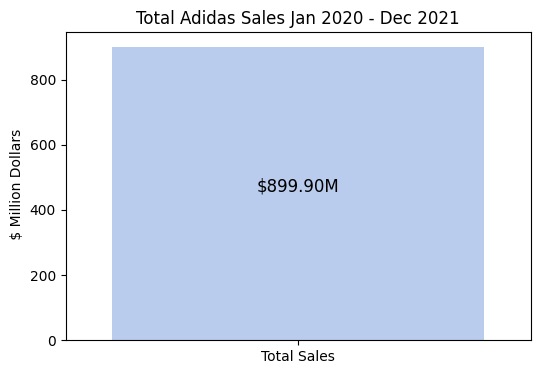

In [18]:
# Assuming 'Total Sales' is a continuous variable
total_sales_sum = df['Total Sales'].sum()
total_sales_sum_in_millions = total_sales_sum / 1e6  # Convert to millions

# Bar plot for the sum of Total Sales
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=['Total Sales'], y=[total_sales_sum_in_millions], alpha=0.5, color='cornflowerblue')
plt.title('Total Adidas Sales Jan 2020 - Dec 2021')
plt.ylabel(' $ Million Dollars')

# Format y-axis labels
plt.ticklabel_format(style='plain', axis='y')  # This line removes scientific notation

# Add dollar sign and value as text annotation
value_text = f'${total_sales_sum_in_millions:.2f}M'
ax.text(0.5, 0.5, value_text, transform=ax.transAxes, ha='center', va='center', fontsize=12)

plt.show()

In [19]:
# Convert 'Invoice Date' to datetime format
df_date_index = df_u
df_date_index['Invoice Date'] = pd.to_datetime(df_date_index['Invoice Date'])

# Set 'Invoice Date' as the index
df_date_index.set_index('Invoice Date', inplace=True)

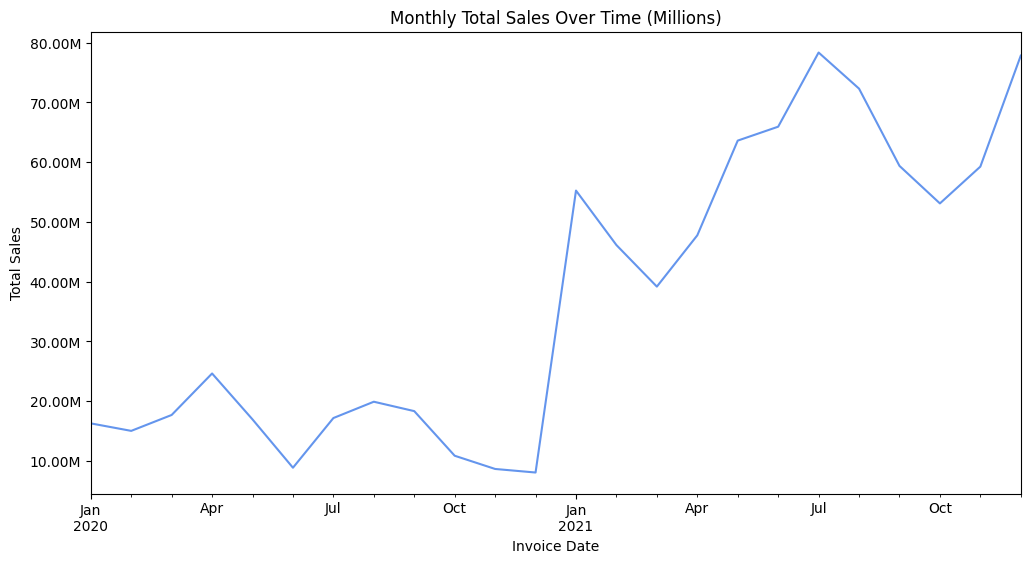

In [20]:
# Resample data to weekly frequency and convert to millions
monthly_sales = df_date_index['Total Sales'].resample('M').sum() / 1e6  # Convert to millions

# Create a custom y-axis formatter to display values in millions
def millions_formatter(x, pos):
    return f'{x:.2f}M'

# Plotting
plt.figure(figsize=(12, 6))
ax = monthly_sales.plot(color='cornflowerblue')
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))  # Apply the custom formatter
plt.title('Monthly Total Sales Over Time (Millions)')
plt.ylabel('Total Sales')
plt.show()


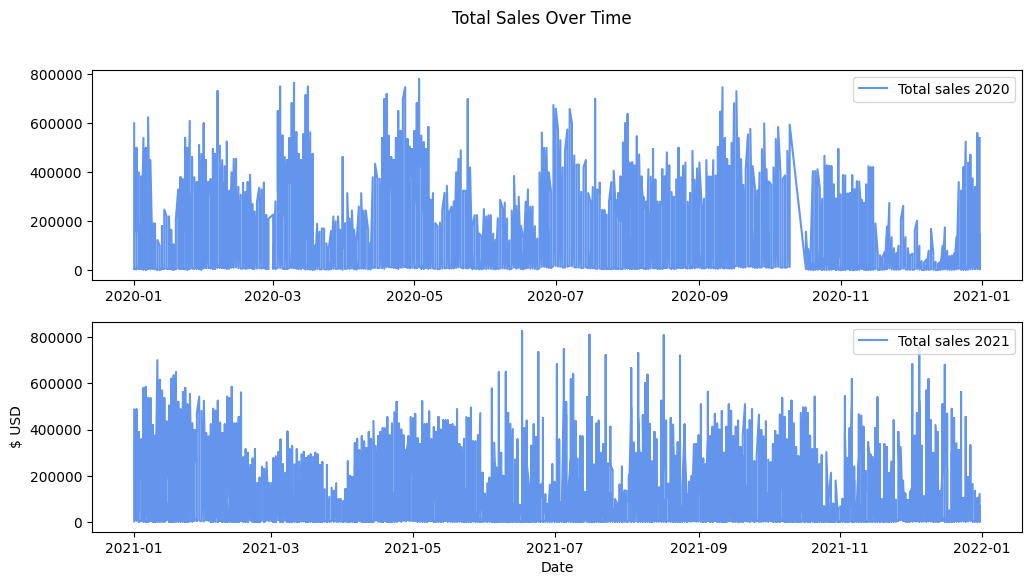

In [21]:
# 1.1 Sales over time
idx = np.where(df_date_index.sort_index().index == '2020-12-31')[0][-1]
xd = df_date_index.sort_index().index

#plt.figure(figsize=(12, 6))
figure, axis = plt.subplots(2, figsize=(12,6))
axis[0].plot(xd[:idx + 1],
         df_date_index['Total Sales'].sort_index()[:idx + 1], label='Total sales 2020', color='cornflowerblue')
axis[0].legend(loc="upper right")

axis[1].plot(xd[idx + 1:], 
         df_date_index['Total Sales'].sort_index()[idx + 1:], label='Total sales 2021', color='cornflowerblue')
axis[1].legend(loc="upper right")
figure.suptitle('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('$ USD')
plt.show()

In [22]:
"""Date and Time Analysis:

Time Series Plot of Total Sales: Plot total sales over time to reveal sales trends.
Time Series Plot of Operating Margin: Monitor how operating margin changes over time.
Bar Chart of Monthly Sales: Aggregate sales data by month and create a bar chart to identify monthly patterns.
"""

'Date and Time Analysis:\n\nTime Series Plot of Total Sales: Plot total sales over time to reveal sales trends.\nTime Series Plot of Operating Margin: Monitor how operating margin changes over time.\nBar Chart of Monthly Sales: Aggregate sales data by month and create a bar chart to identify monthly patterns.\n'

In [23]:
df_u = df.copy()

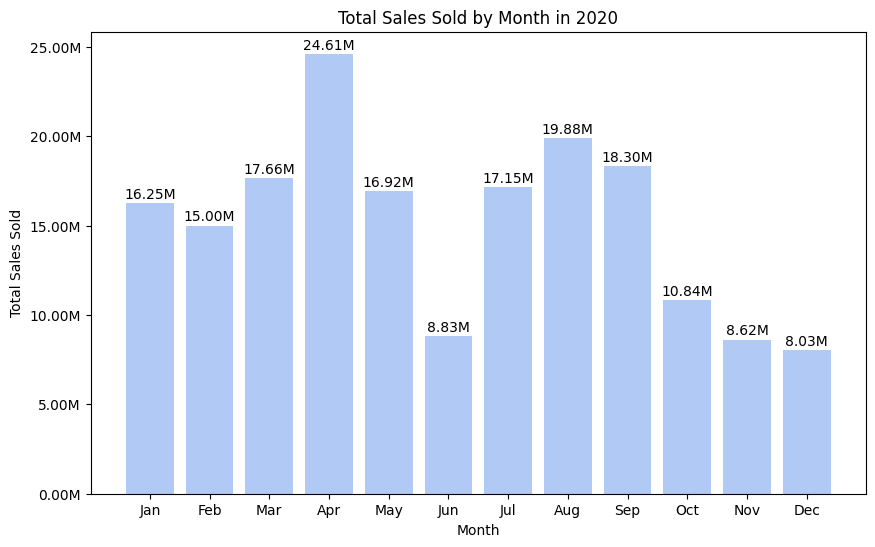

In [24]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Specify the year you want to filter by (e.g., 2020)
target_year = 2020

# Filter data for the specified year
df_filtered = df_u[df_u['Year'] == target_year].copy()  # Use .copy() to create a copy of the DataFrame

# Extract month from 'Invoice Date'
df_filtered['Month'] = df_filtered['Invoice Date'].dt.month

# Group by 'Month' and calculate total units sold
units_by_month = df_filtered.groupby('Month')['Total Sales'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(units_by_month['Month'], units_by_month['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Total Sales Sold')
plt.title(f'Total Sales Sold by Month in {target_year}')

# Adding total units sold on top of bars in millions
for i, units_sold in enumerate(units_by_month['Total Sales']):
    plt.text(i + 1, units_sold + 0.02 * max(units_by_month['Total Sales']), f'{units_sold / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

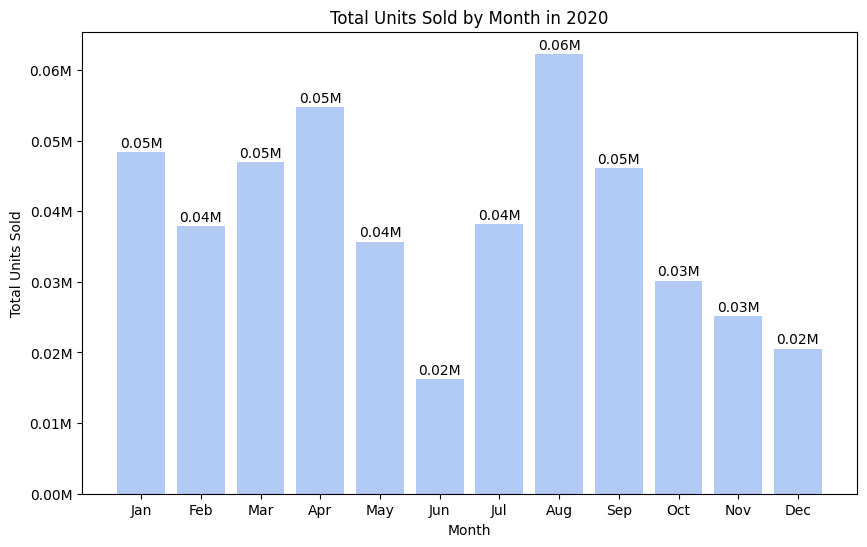

In [25]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Specify the year you want to filter by (e.g., 2020)
target_year = 2020

# Filter data for the specified year
df_filtered = df[df['Year'] == target_year].copy()  # Use .copy() to create a copy of the DataFrame

# Extract month from 'Invoice Date'
df_filtered['Month'] = df_filtered['Invoice Date'].dt.month

# Group by 'Month' and calculate total units sold
units_by_month = df_filtered.groupby('Month')['Units Sold'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(units_by_month['Month'], units_by_month['Units Sold'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title(f'Total Units Sold by Month in {target_year}')

# Adding total units sold on top of bars in millions
for i, units_sold in enumerate(units_by_month['Units Sold']):
    plt.text(i + 1, units_sold + 0.02 * max(units_by_month['Units Sold']), f'{units_sold / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

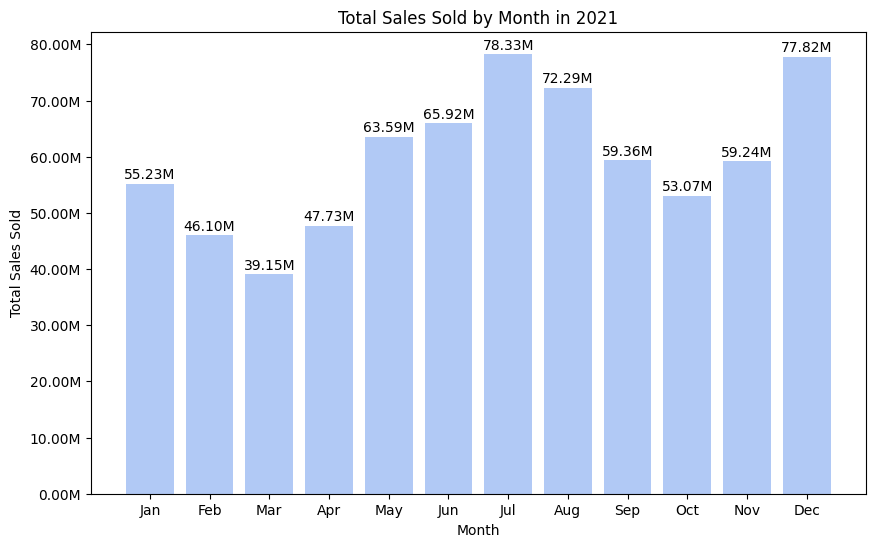

In [26]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Specify the year you want to filter by (e.g., 2020)
target_year = 2021

# Filter data for the specified year
df_filtered = df_u[df_u['Year'] == target_year].copy()  # Use .copy() to create a copy of the DataFrame

# Extract month from 'Invoice Date'
df_filtered['Month'] = df_filtered['Invoice Date'].dt.month

# Group by 'Month' and calculate total units sold
units_by_month = df_filtered.groupby('Month')['Total Sales'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(units_by_month['Month'], units_by_month['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Total Sales Sold')
plt.title(f'Total Sales Sold by Month in {target_year}')

# Adding total units sold on top of bars in millions
for i, units_sold in enumerate(units_by_month['Total Sales']):
    plt.text(i + 1, units_sold + 0.02 * max(units_by_month['Total Sales']), f'{units_sold / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

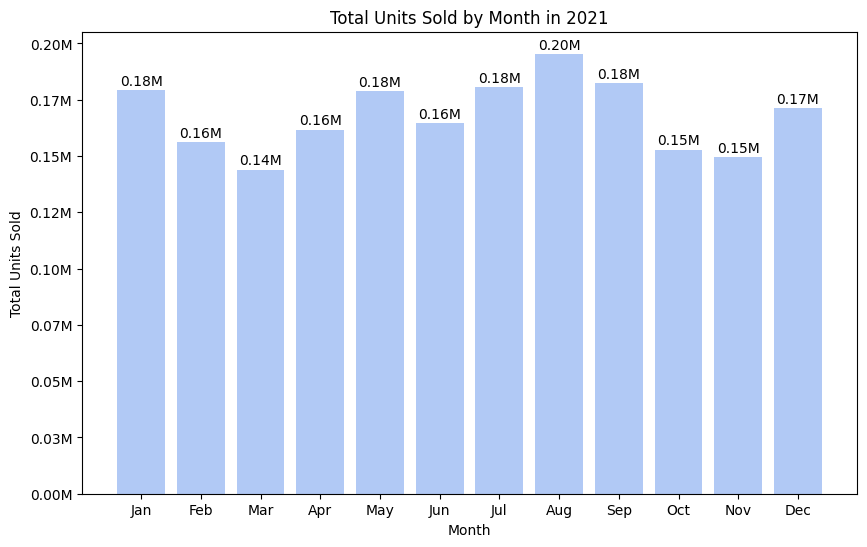

In [27]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Specify the year you want to filter by (e.g., 2020)
target_year = 2021

# Filter data for the specified year
df_filtered = df[df['Year'] == target_year].copy()  # Use .copy() to create a copy of the DataFrame

# Extract month from 'Invoice Date'
df_filtered['Month'] = df_filtered['Invoice Date'].dt.month

# Group by 'Month' and calculate total units sold
units_by_month = df_filtered.groupby('Month')['Units Sold'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Plotting a bar chart
plt.figure(figsize=(10, 6))
plt.bar(units_by_month['Month'], units_by_month['Units Sold'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Month')
plt.ylabel('Total Units Sold')
plt.title(f'Total Units Sold by Month in {target_year}')

# Adding total units sold on top of bars in millions
for i, units_sold in enumerate(units_by_month['Units Sold']):
    plt.text(i + 1, units_sold + 0.02 * max(units_by_month['Units Sold']), f'{units_sold / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [28]:
 """ 2. Product Categories: 
 Display the frequency of different product categories. 
 This will help identify the most popular product types."""

' 2. Product Categories: \nDisplay the frequency of different product categories. \nThis will help identify the most popular product types.'

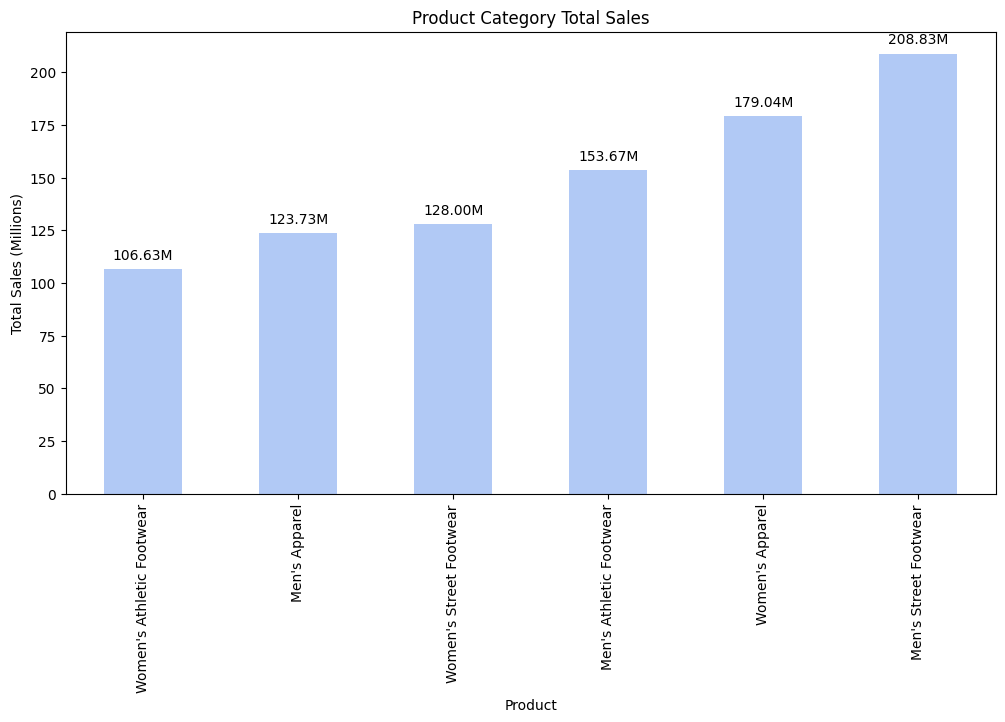

In [29]:
# Group by product and calculate total sales
product_sales = df.groupby('Product')['Total Sales'].sum() / 1_000_000  # Convert sales to millions

# Plotting product-wise sales
plt.figure(figsize=(12, 6))
ax = product_sales.sort_values().plot(kind='bar', alpha=0.5, color='cornflowerblue')
plt.title('Product Category Total Sales')
plt.xlabel('Product')
plt.ylabel('Total Sales (Millions)')  # Update the y-axis label

# Adding counts on top of bars
for p, count in zip(ax.patches, product_sales.sort_values()):
    ax.annotate(f'{count:.2f}M', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

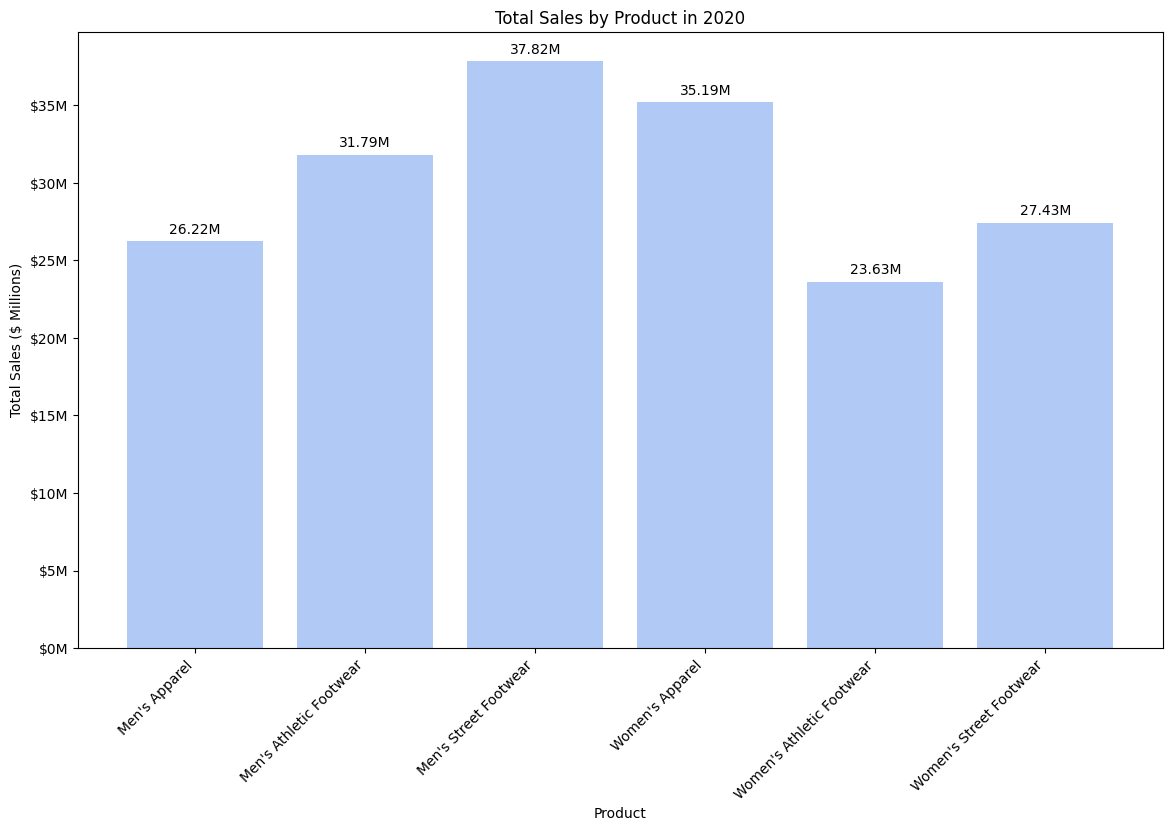

In [30]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2020
df_2020 = df_u[df_u['Year'] == 2020]

# Group by 'Product' and calculate total sales
total_sales_by_product = df_2020.groupby('Product')['Total Sales'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Plotting a bar chart
plt.figure(figsize=(14, 8))
plt.bar(total_sales_by_product['Product'], total_sales_by_product['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Total Sales by Product in 2020')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding total sales on top of bars in millions
for i, sales in enumerate(total_sales_by_product['Total Sales']):
    plt.text(i, sales + 0.02 * max(total_sales_by_product['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

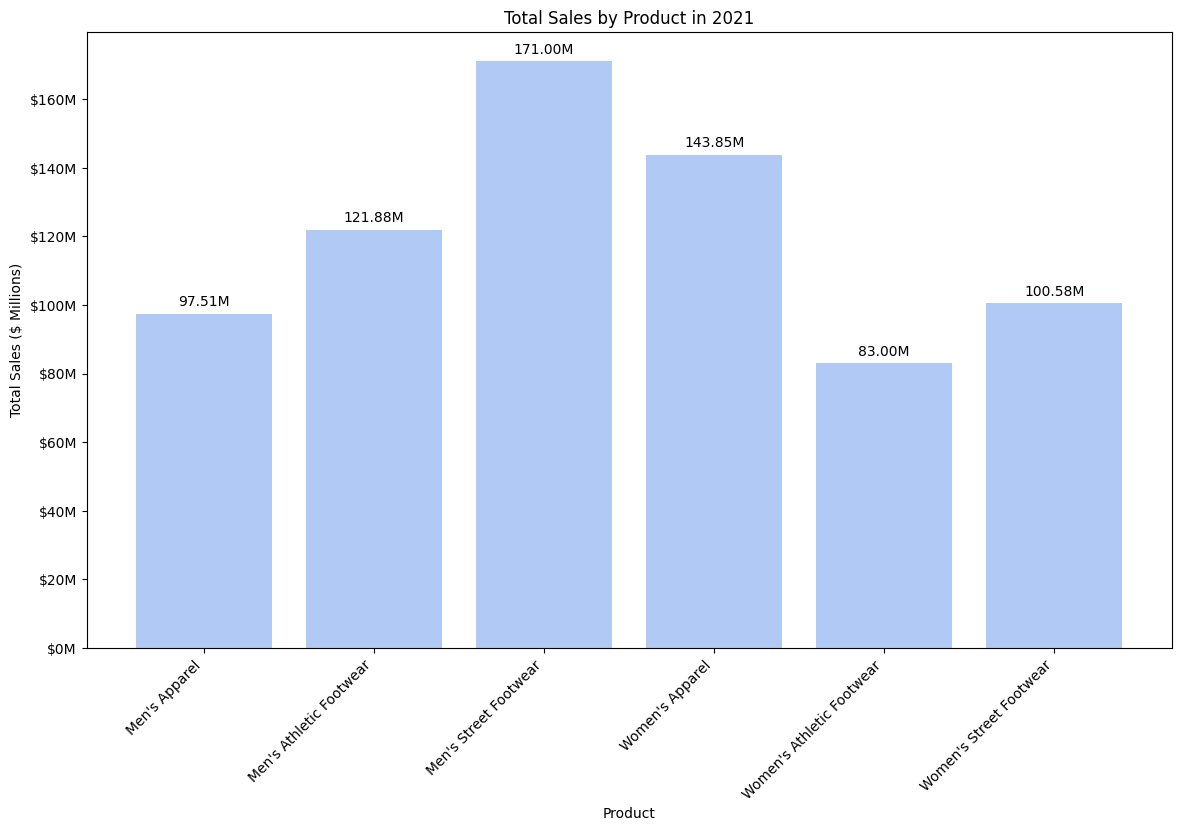

In [31]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2021
df_2021 = df_u[df_u['Year'] == 2021]

# Group by 'Product' and calculate total sales
total_sales_by_product = df_2021.groupby('Product')['Total Sales'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Plotting a bar chart
plt.figure(figsize=(14, 8))
plt.bar(total_sales_by_product['Product'], total_sales_by_product['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Product')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Total Sales by Product in 2021')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Adding total sales on top of bars in millions
for i, sales in enumerate(total_sales_by_product['Total Sales']):
    plt.text(i, sales + 0.02 * max(total_sales_by_product['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

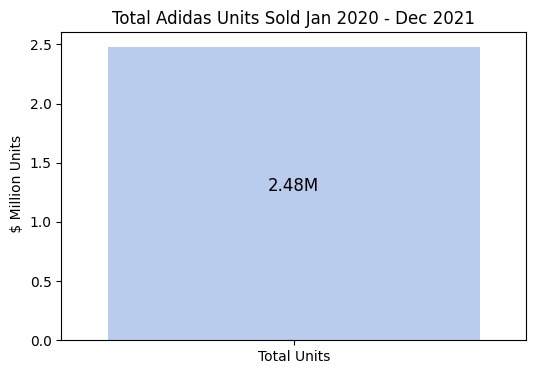

In [32]:
# Assuming 'Total Units' is a continuous variable
total_sales_sum = df['Units Sold'].sum()
total_sales_sum_in_millions = total_sales_sum / 1e6  # Convert to millions

# Bar plot for the sum of Total Sales
plt.figure(figsize=(6, 4))
ax = sns.barplot(x=['Total Units'], y=[total_sales_sum_in_millions], alpha=0.5, color='cornflowerblue')
plt.title('Total Adidas Units Sold Jan 2020 - Dec 2021')
plt.ylabel(' $ Million Units')

# Format y-axis labels
plt.ticklabel_format(style='plain', axis='y')  # This line removes scientific notation

# Add dollar sign and value as text annotation
value_text = f'{total_sales_sum_in_millions:.2f}M'
ax.text(0.5, 0.5, value_text, transform=ax.transAxes, ha='center', va='center', fontsize=12)

plt.show()

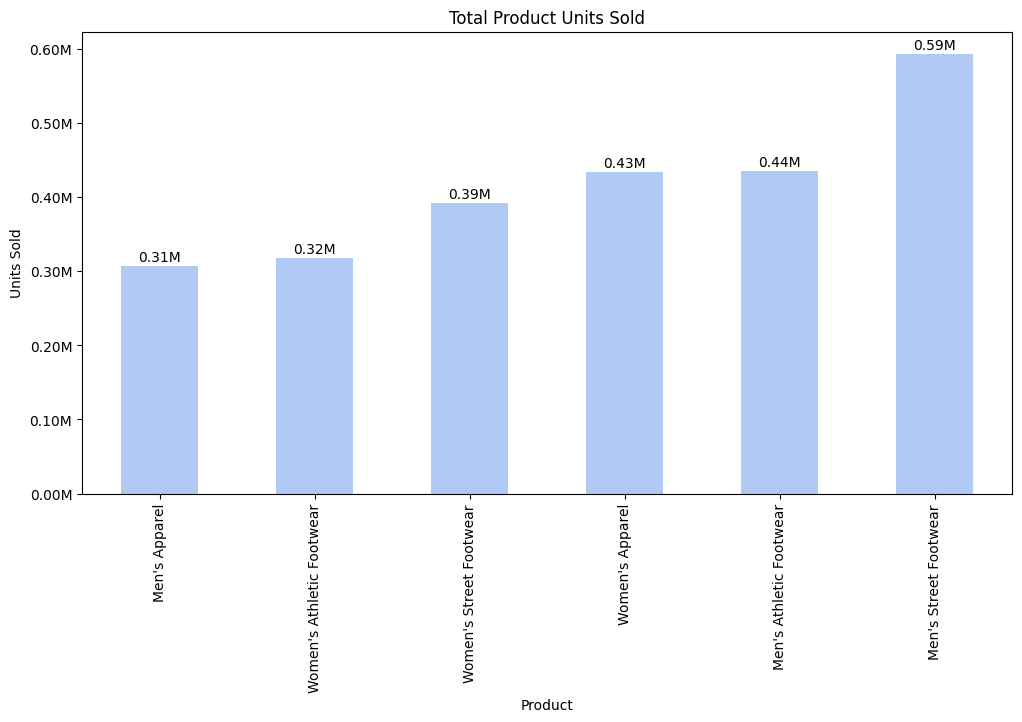

In [33]:
# Group by product and calculate total sales
product_sales = df_u.groupby('Product')['Units Sold'].sum()

# Plotting product-wise sales
plt.figure(figsize=(12, 6))
product_sales.sort_values().plot(kind='bar', alpha=0.5, color='cornflowerblue')
plt.title('Total Product Units Sold')
plt.xlabel('Product')
plt.ylabel('Units Sold')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1_000_000:.2f}M'

# Adding units sold on top of bars in millions
for i, units_sold in enumerate(product_sales.sort_values()):
    plt.text(i, units_sold + 0.02 * max(product_sales), f'{units_sold / 1_000_000:.2f}M', ha='center', va='center', rotation=0)

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels

plt.show()

In [34]:
"""Retailers: 
    Visualize the performance of different retailers using a bar chart. 
    This can highlight which retailers contribute the most to your sales.
"""

'Retailers: \n    Visualize the performance of different retailers using a bar chart. \n    This can highlight which retailers contribute the most to your sales.\n'

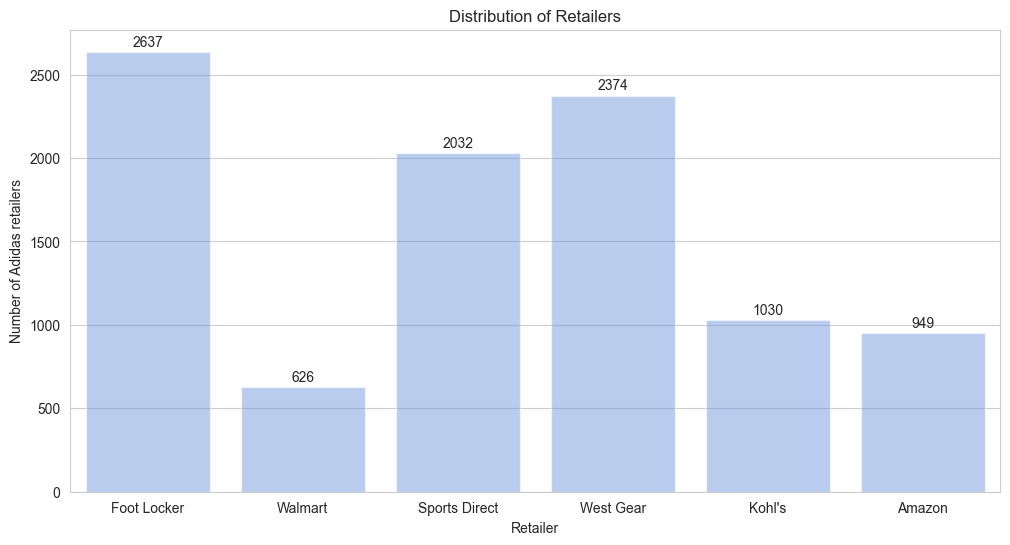

In [35]:
plt.figure(figsize=(12, 6))
# Set the style to 'whitegrid'
sns.set_style('whitegrid')
ax1 = sns.countplot(x='Retailer', data=df, alpha=0.5, color='cornflowerblue')
# Enable gridlines using Matplotlib
plt.title('Distribution of Retailers')
plt.ylabel('Number of Adidas retailers')

# Adding counts on top of bars as integers
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 7), textcoords='offset points')

plt.show()



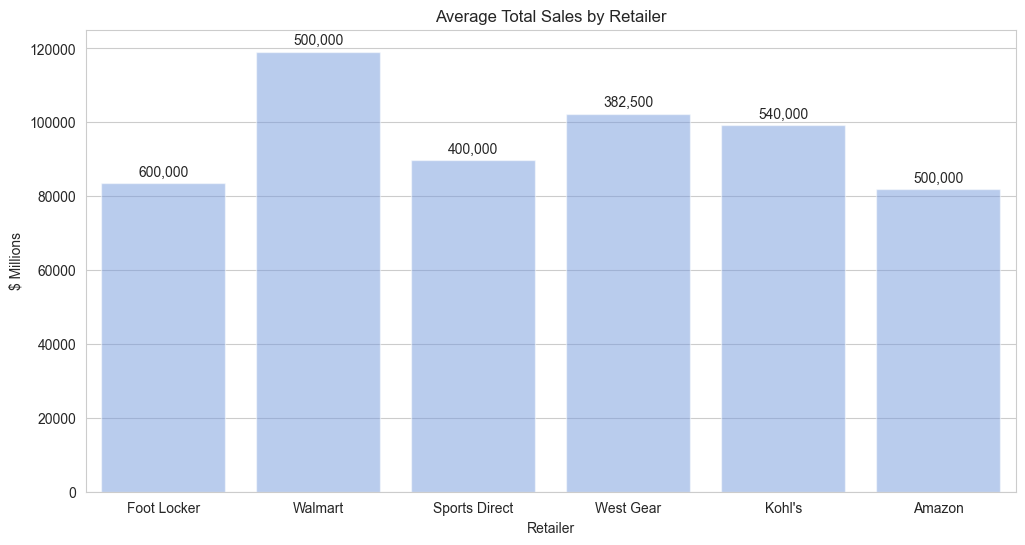

In [36]:
# Barplot for Average Total Sales by Retailer
plt.figure(figsize=(12, 6))
ax1 = sns.barplot(x='Retailer', y='Total Sales', data=df_u, errorbar=None, alpha=0.5, color='cornflowerblue')
plt.title('Average Total Sales by Retailer')
plt.ylabel('$ Millions')

# Adding total sales on top of bars
for p, sales in zip(ax1.patches, df_u['Total Sales']):
    ax1.annotate(f'{sales:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()



In [37]:
"""Sales method: 
    Visualize the performance of different retailers using a bar chart. 
    This can highlight which retailers contribute the most to your sales.
"""

'Sales method: \n    Visualize the performance of different retailers using a bar chart. \n    This can highlight which retailers contribute the most to your sales.\n'

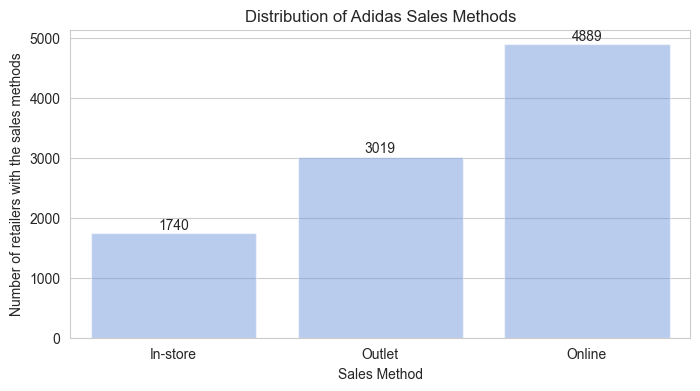

In [38]:
# Countplot for Sales Method
plt.figure(figsize=(8, 4))
ax2 = sns.countplot(x='Sales Method', data=df, alpha=0.5, color='cornflowerblue') #color='cornflowerblue' color='lightcoral'
plt.title('Distribution of Adidas Sales Methods')
plt.ylabel('Number of retailers with the sales methods')

# Adding counts on top of bars as integers
for p in ax2.patches:
    ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 6), textcoords='offset points')

plt.show()

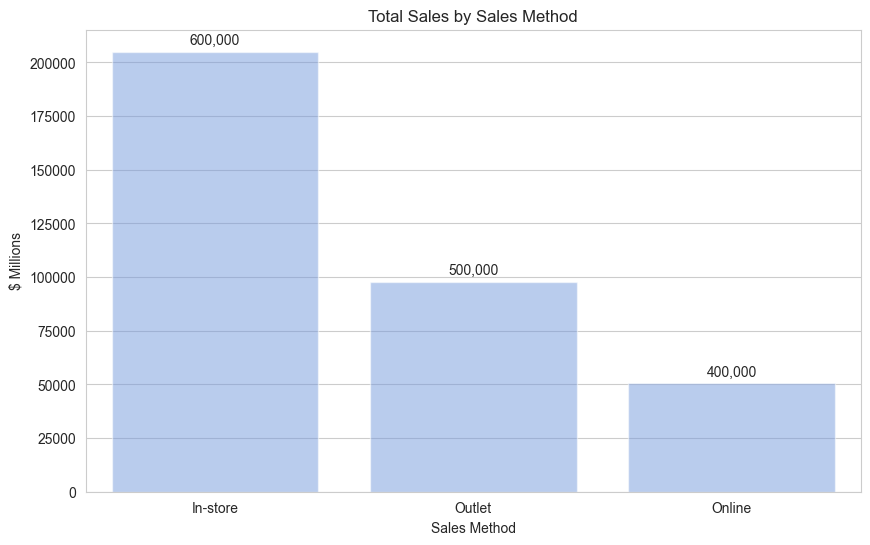

In [39]:
# Boxplot for Total Sales by Sales Method
plt.figure(figsize=(10, 6))
ax2 = sns.barplot(x='Sales Method', y='Total Sales', data=df_u, errorbar=None, alpha=0.5, color='cornflowerblue')
plt.title('Total Sales by Sales Method')
plt.ylabel('$ Millions')

# Adding total sales on top of bars
for p, sales in zip(ax2.patches, df_u['Total Sales']):
    ax2.annotate(f'{sales:,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points')

plt.show()

In [40]:
"""Geographical Analysis:

Geospatial Heatmap of Sales by Region/State/City: Create a heatmap to visualize sales concentration geographically.
Bar Chart of Sales by State or Region: Compare sales performance across different states or regions.
"""

'Geographical Analysis:\n\nGeospatial Heatmap of Sales by Region/State/City: Create a heatmap to visualize sales concentration geographically.\nBar Chart of Sales by State or Region: Compare sales performance across different states or regions.\n'

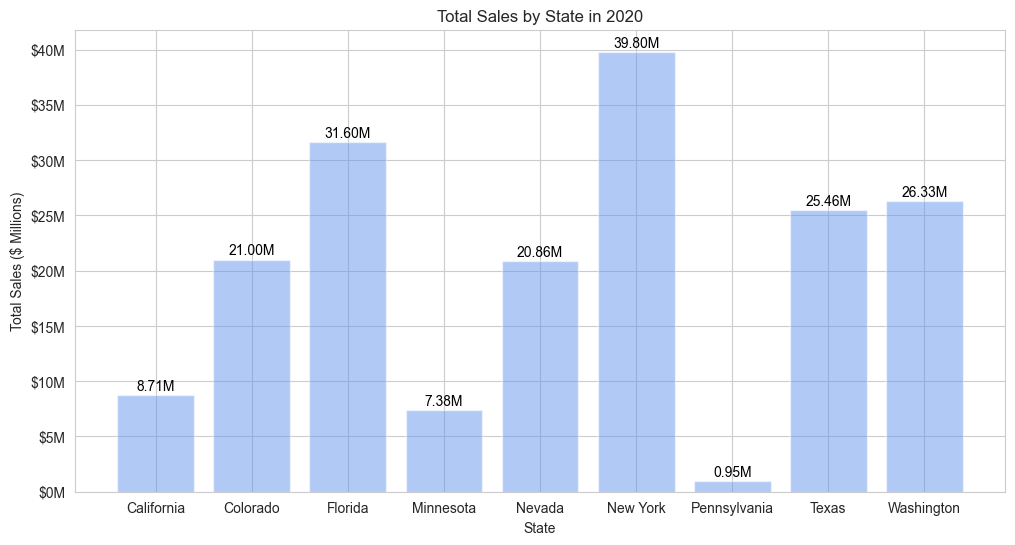

In [41]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2020
df_2020 = df_u[df_u['Year'] == 2020]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2020.groupby('State')['Total Sales'].sum().reset_index()

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(total_sales_by_state['State'], total_sales_by_state['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('State')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Total Sales by State in 2020')

# Adding total sales on top of bars in millions
for i, sales in enumerate(total_sales_by_state['Total Sales']):
    plt.text(i, sales + 0.02 * max(total_sales_by_state['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

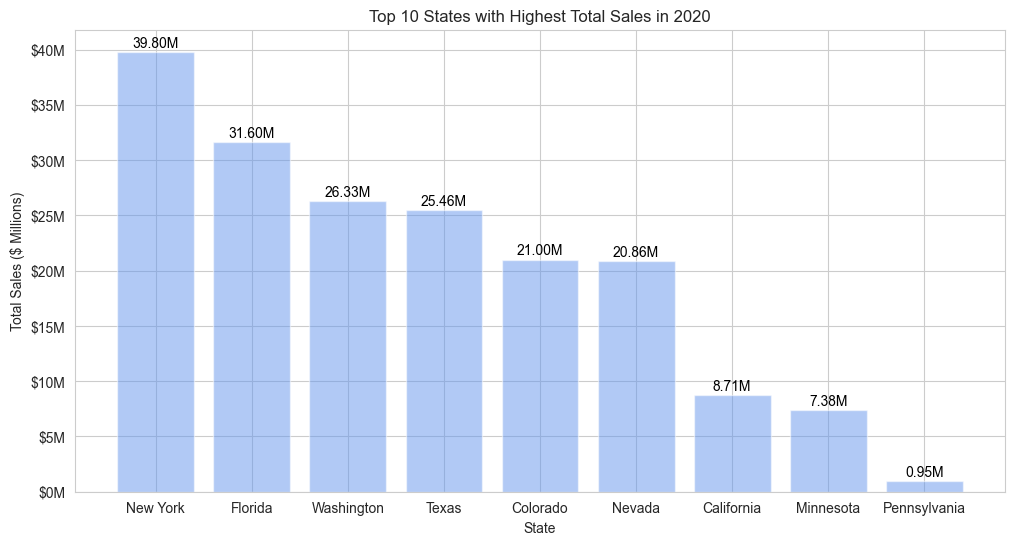

In [42]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2020
df_2020 = df_u[df_u['Year'] == 2020]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2020.groupby('State')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nlargest(10, 'Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Create a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['State'], top_10_states['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('State')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 10 States with Highest Total Sales in 2020')

# Adding total sales on top of bars in millions
for i, sales in enumerate(top_10_states['Total Sales']):
    plt.text(i, sales + 0.02 * max(top_10_states['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

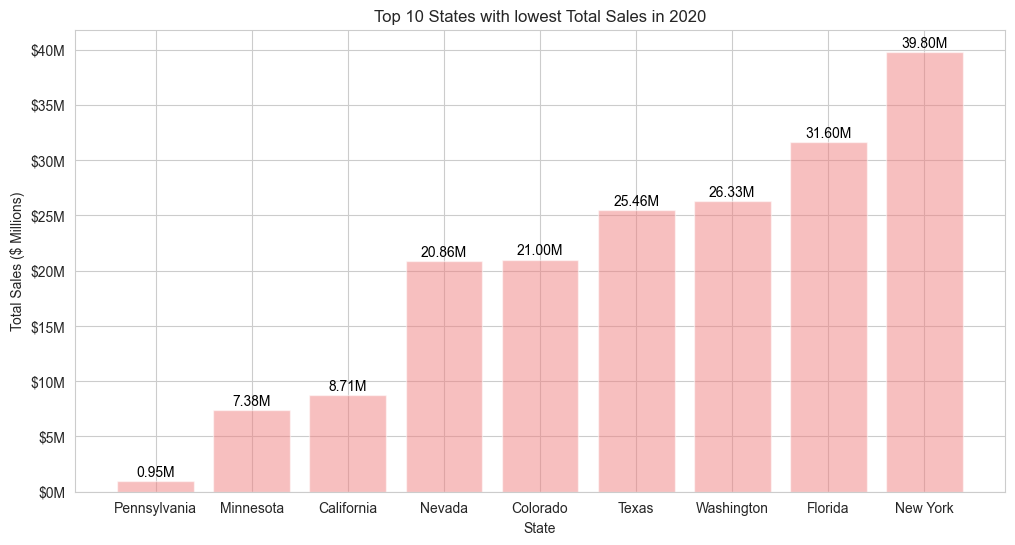

In [43]:
# Convert 'Invoice Date' to datetime for easier handling
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])

# Extract year from 'Invoice Date'
df['Year'] = df['Invoice Date'].dt.year

# Filter data for the year 2020
df_2020 = df[df['Year'] == 2020]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2020.groupby('State')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nsmallest(10, 'Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Plotting a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['State'], top_10_states['Total Sales'], alpha=0.5, color='lightcoral')
plt.xlabel('State')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 10 States with lowest Total Sales in 2020')

# Adding total sales on top of bars in millions
for i, sales in enumerate(top_10_states['Total Sales']):
    plt.text(i, sales + 0.02 * max(top_10_states['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

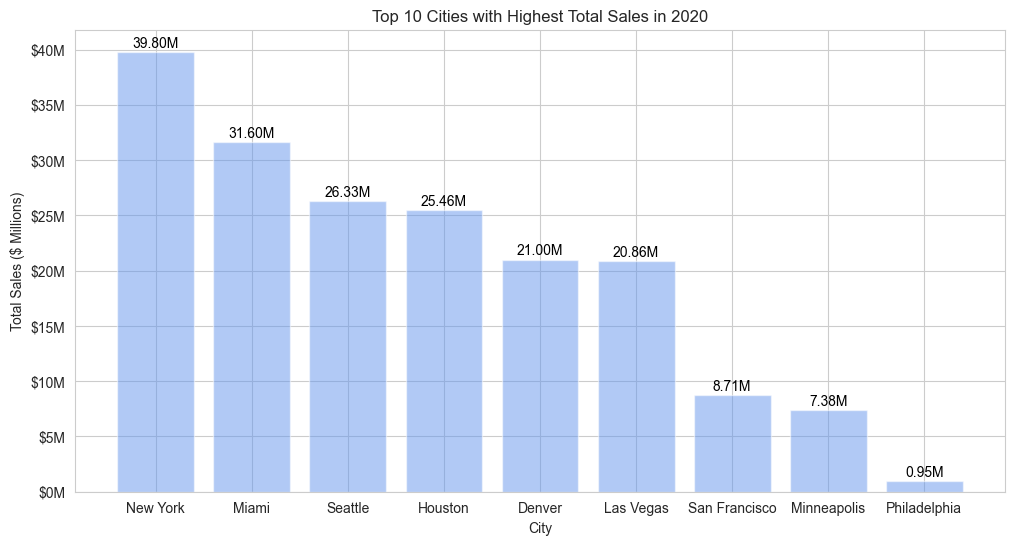

In [44]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2022
df_2020 = df_u[df_u['Year'] == 2020]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2020.groupby('City')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nlargest(10, 'Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Plotting a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['City'], top_10_states['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('City')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 10 Cities with Highest Total Sales in 2020')

# Adding total sales on top of bars in millions
for i, sales in enumerate(top_10_states['Total Sales']):
    plt.text(i, sales + 0.02 * max(top_10_states['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

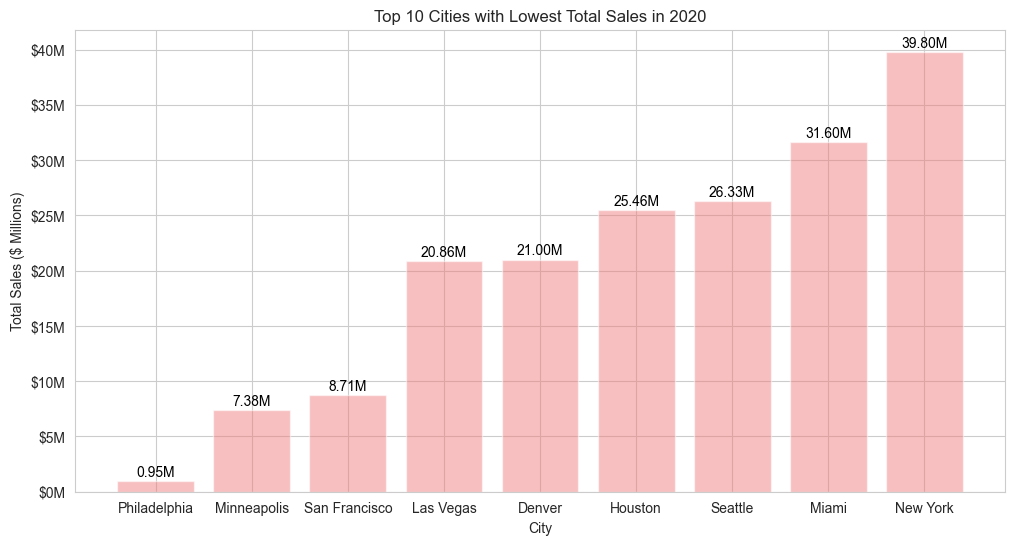

In [45]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2022
df_2020 = df_u[df_u['Year'] == 2020]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2020.groupby('City')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nsmallest(10, 'Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Plotting a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['City'], top_10_states['Total Sales'], alpha=0.5, color='lightcoral')
plt.xlabel('City')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 10 Cities with Lowest Total Sales in 2020')

# Adding total sales on top of bars in millions
for i, sales in enumerate(top_10_states['Total Sales']):
    plt.text(i, sales + 0.02 * max(top_10_states['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

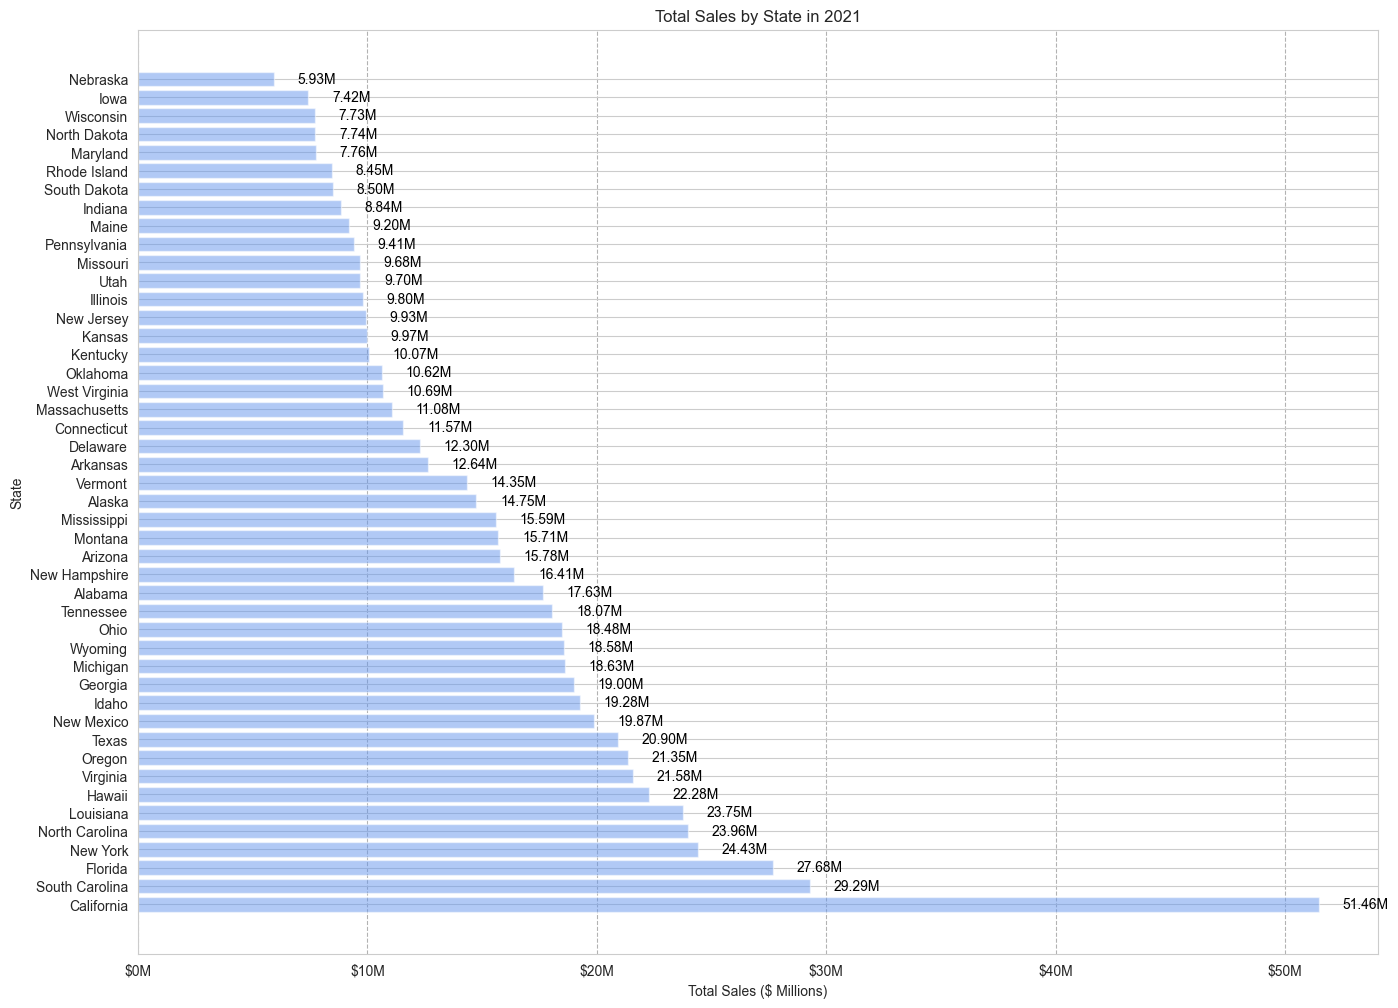

In [46]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2021
df_2021 = df_u[df_u['Year'] == 2021]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2021.groupby('State')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nlargest(10, 'Total Sales')
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2020
df_2020 = df_u[df_u['Year'] == 2021]

# Sort the states by total sales in descending order
total_sales_by_state = total_sales_by_state.sort_values(by='Total Sales', ascending=False)

# Create a horizontal bar chart
plt.figure(figsize=(16, 12))
plt.barh(total_sales_by_state['State'], total_sales_by_state['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('Total Sales ($ Millions)')
plt.ylabel('State')
plt.title('Total Sales by State in 2021')

# Adding total sales on the right of the bars in millions
for i, sales in enumerate(total_sales_by_state['Total Sales']):
    plt.text(sales + 0.02 * max(total_sales_by_state['Total Sales']), i, f'{sales / 1_000_000:.2f}M', va='center', color='black')

plt.gca().xaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for x-axis labels
plt.grid(axis='x', linestyle='--', alpha=0.6, color='gray')  # Add a grid for reference
plt.show()


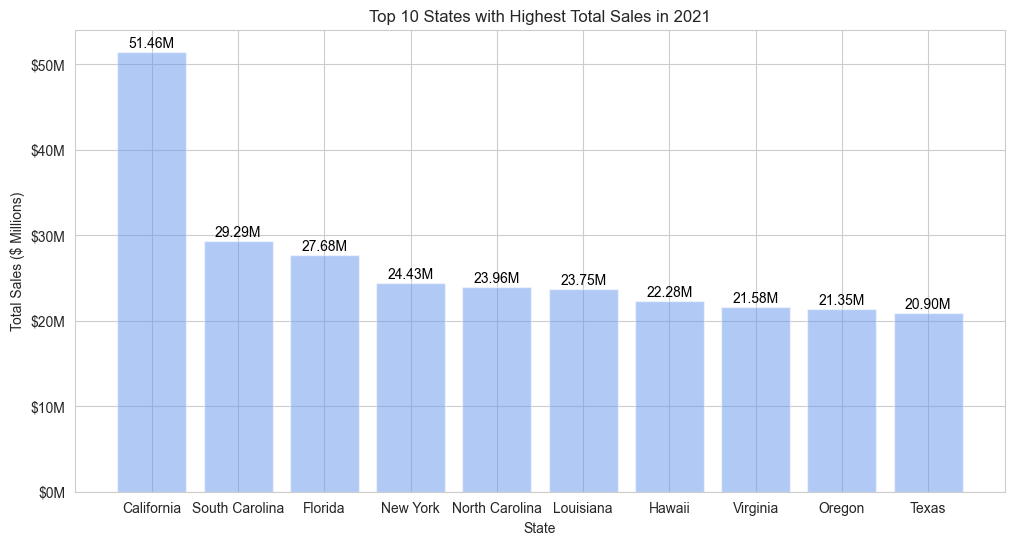

In [47]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2021
df_2021 = df_u[df_u['Year'] == 2021]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2021.groupby('State')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nlargest(10, 'Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Create a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['State'], top_10_states['Total Sales'], alpha=0.5, color='cornflowerblue')
plt.xlabel('State')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 10 States with Highest Total Sales in 2021')

# Adding total sales on top of bars in millions
for i, sales in enumerate(top_10_states['Total Sales']):
    plt.text(i, sales + 0.02 * max(top_10_states['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

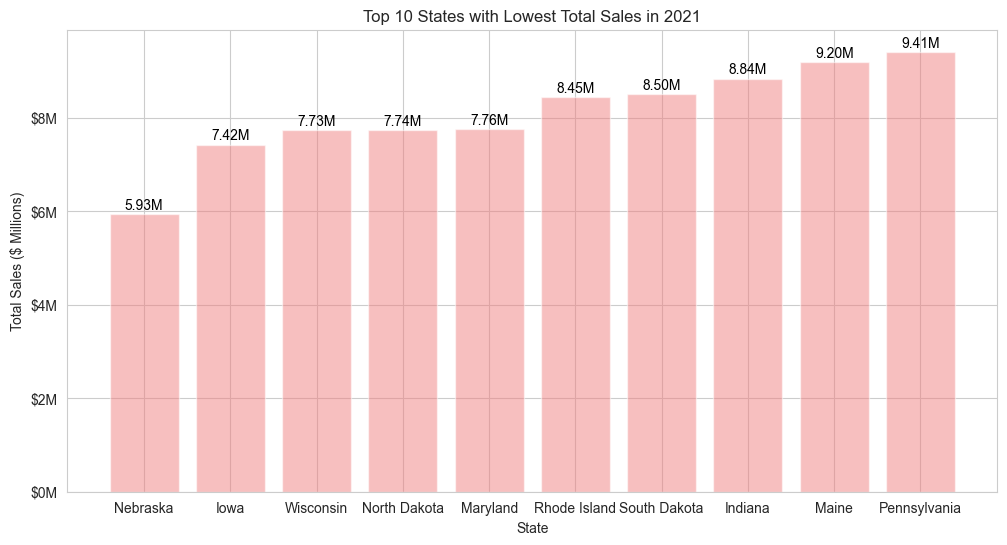

In [48]:
# Convert 'Invoice Date' to datetime for easier handling
df_u['Invoice Date'] = pd.to_datetime(df_u['Invoice Date'])

# Extract year from 'Invoice Date'
df_u['Year'] = df_u['Invoice Date'].dt.year

# Filter data for the year 2021
df_2021 = df_u[df_u['Year'] == 2021]

# Group by 'State' and calculate total sales
total_sales_by_state = df_2021.groupby('State')['Total Sales'].sum().reset_index()

# Get the top 10 states with the highest total sales
top_10_states = total_sales_by_state.nsmallest(10, 'Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.0f}M'

# Create a bar chart for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['State'], top_10_states['Total Sales'], alpha=0.5, color='lightcoral')
plt.xlabel('State')
plt.ylabel('Total Sales ($ Millions)')
plt.title('Top 10 States with Lowest Total Sales in 2021')

# Adding total sales on top of bars in millions
for i, sales in enumerate(top_10_states['Total Sales']):
    plt.text(i, sales + 0.02 * max(top_10_states['Total Sales']), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels
plt.show()

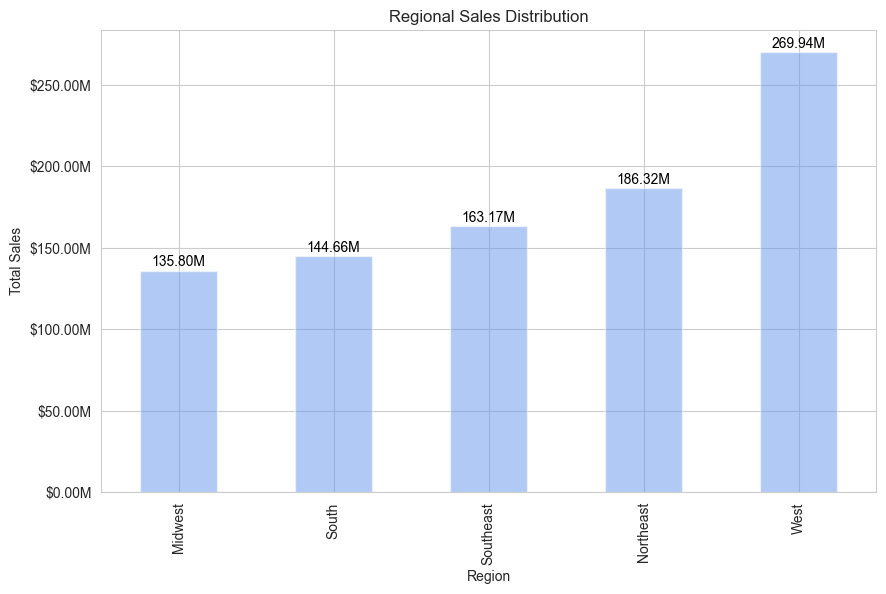

In [49]:
# Group by region and calculate total sales
regional_sales = df_u.groupby('Region')['Total Sales'].sum()

# Plotting regional sales
plt.figure(figsize=(10, 6))
regional_sales.sort_values().plot(kind='bar', alpha=0.5, color='cornflowerblue')
plt.title('Regional Sales Distribution')
plt.xlabel('Region')
plt.ylabel('Total Sales')

# Function to format y-axis labels in millions
def millions_formatter(x, pos):
    return f'${x / 1_000_000:.2f}M'

# Adding total sales on top of bars in millions
for i, sales in enumerate(regional_sales.sort_values()):
    plt.text(i, sales + 0.02 * max(regional_sales), f'{sales / 1_000_000:.2f}M', ha='center', va='center', rotation=0, color='black')

plt.gca().yaxis.set_major_formatter(millions_formatter)  # Use the millions formatter for y-axis labels

plt.show()


In [50]:
#kpis

In [51]:
# Convert 'Invoice Date' to datetime format
df_date_index = df_u
df_date_index['Invoice Date'] = pd.to_datetime(df_date_index['Invoice Date'])

# Set 'Invoice Date' as the index
df_date_index.set_index('Invoice Date', inplace=True)

In [52]:
# Sales Growth Over Time

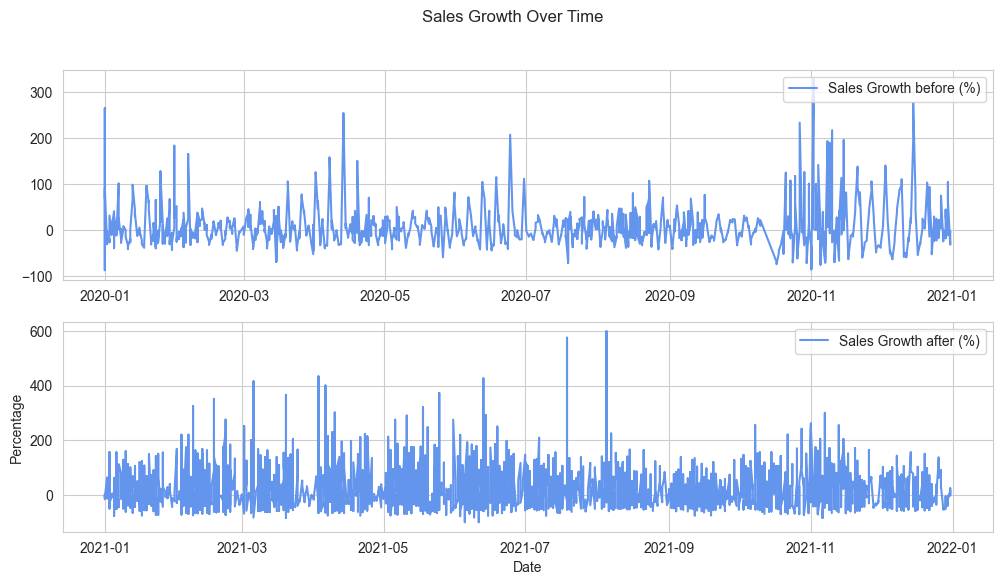

In [53]:
# KPI 1: Profit Margin
df_u['Profit Margin'] = (df_u['Operating Profit'] / df_u['Total Sales']) * 100

# KPI 2: Sales Growth
df_u['Sales Growth'] = df_u['Total Sales'].pct_change() * 100

# Visualize KPIs as needed (some are not visualized due to their nature)
# Example: Sales Growth over time
idx = np.where(df_u.sort_index().index == '2020-12-31')[0][-1]
xd = df_u.sort_index().index

figure, axis = plt.subplots(2, figsize=(12,6))
axis[0].plot(xd[:idx + 1],
         df_u['Sales Growth'].sort_index()[:idx + 1], label='Sales Growth before (%)', color='cornflowerblue')
axis[0].legend(loc="upper right")

axis[1].plot(xd[idx + 1:], 
         df_u['Sales Growth'].sort_index()[idx + 1:], label='Sales Growth after (%)', color='cornflowerblue')
axis[1].legend(loc="upper right")
figure.suptitle('Sales Growth Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.show()

In [54]:
#Total units Sold Over Time

1302 8346


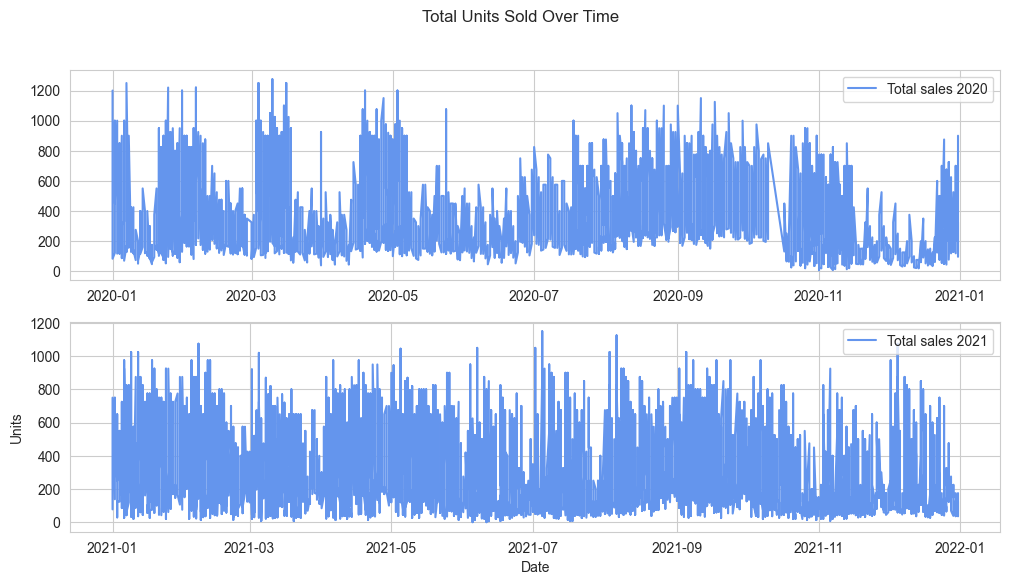

In [55]:
# Example: Sales Growth over time
idx = np.where(df_u.sort_index().index == '2020-12-31')[0][-1]
xd = df_u.sort_index().index
print(len(xd[:idx + 1]), len(xd[idx + 1:]))

#plt.figure(figsize=(12, 6))
figure, axis = plt.subplots(2, figsize=(12,6))
axis[0].plot(xd[:idx + 1],
         df_u['Units Sold'].sort_index()[:idx + 1], label='Total sales 2020', color='cornflowerblue')
axis[0].legend(loc="upper right")

axis[1].plot(xd[idx + 1:], 
         df_u['Units Sold'].sort_index()[idx + 1:], label='Total sales 2021', color='cornflowerblue')
axis[1].legend(loc="upper right")
figure.suptitle('Total Units Sold Over Time')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

In [56]:
#Operating Profit Over Time (Time Series Plot): Plot the operating profit over time to track profitability trends.

1302 8346


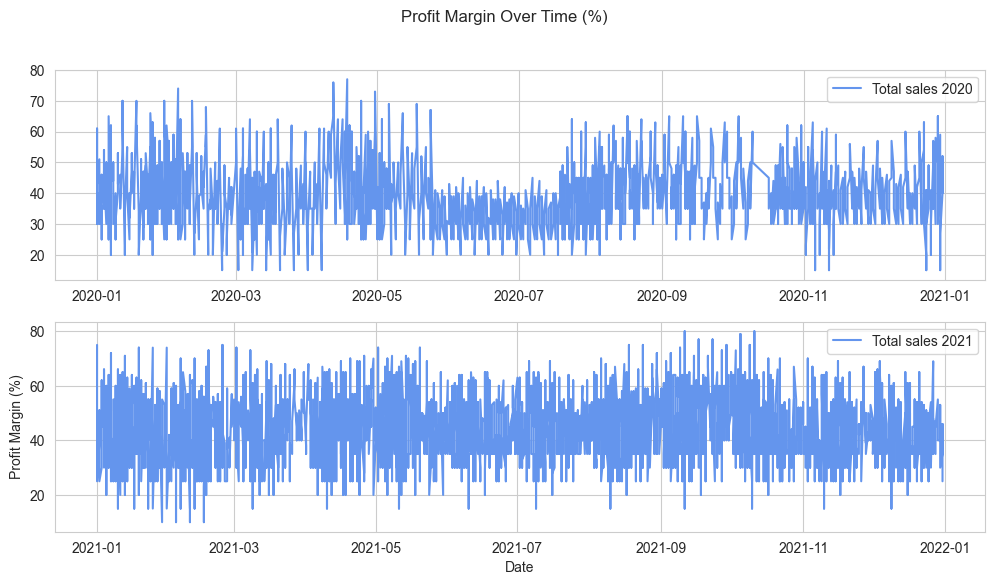

In [57]:
# Example: Sales Growth over time
idx = np.where(df_u.sort_index().index == '2020-12-31')[0][-1]
xd = df_u.sort_index().index
print(len(xd[:idx + 1]), len(xd[idx + 1:]))

#plt.figure(figsize=(12, 6))
figure, axis = plt.subplots(2, figsize=(12,6))
axis[0].plot(xd[:idx + 1],
         df_u['Profit Margin'].sort_index()[:idx + 1], label='Total sales 2020', color='cornflowerblue')
axis[0].legend(loc="upper right")

axis[1].plot(xd[idx + 1:], 
         df_u['Profit Margin'].sort_index()[idx + 1:], label='Total sales 2021', color='cornflowerblue')
axis[1].legend(loc="upper right")
figure.suptitle('Profit Margin Over Time (%)')
plt.xlabel('Date')
plt.ylabel('Profit Margin (%)')
plt.show()

In [58]:
"""
Exploratory Data Analysis of Customer Shopping Preferences Dataset

Unveiling Consumer Insights for Informed Decision-Making

Context

In the ever-evolving landscape of business, understanding and responding to consumer preferences is paramount. 
The Customer Shopping Preferences Dataset presents an invaluable window into the world of consumer behavior 
and buying habits. In this era of data-driven decision-making, the ability to discern trends and customer 
preferences is not just a competitive advantage but a necessity.
"""

'\nExploratory Data Analysis of Customer Shopping Preferences Dataset\n\nUnveiling Consumer Insights for Informed Decision-Making\n\nContext\n\nIn the ever-evolving landscape of business, understanding and responding to consumer preferences is paramount. \nThe Customer Shopping Preferences Dataset presents an invaluable window into the world of consumer behavior \nand buying habits. In this era of data-driven decision-making, the ability to discern trends and customer \npreferences is not just a competitive advantage but a necessity.\n'

In [59]:
"""
The Adidas Sales Dataset offers a unique opportunity to delve into the world of consumer behavior, 
preferences, and purchasing patterns. Extracting, dissecting, and understanding this data is 
not merely an exercise; it's a strategic imperative for businesses seeking to thrive in the dynamic world of retail.

Why Extract This Data from Sales?

This dataset is a virtual gateway to understanding what drives customer choices and influences their loyalty. 
By extracting and analyzing this data, we embark on a journey to uncover the inner workings of Adidas sales. 
Here's why it matters:

Customer-Centric Strategies: Every transaction in this dataset represents a customer's choice. 
By understanding these choices, we can tailor strategies to meet customer expectations, 
from product design to marketing efforts.

Product Insights: Which Adidas products are customer favorites? By scrutinizing item sales, 
we can identify best-sellers, uncover trends, and optimize product offerings.

Regional Dynamics: The "Location" column reveals geographical preferences. 
This information can guide inventory management, marketing localization, and expansion strategies.

Customer Satisfaction: "Review Rating" data tells us about customer satisfaction levels. 
A deeper understanding can lead to improvements in product quality and service.

Promotion and Discount Optimization: Analyzing "Discount Applied" and "Promo Code Used" 
can reveal how incentives influence purchasing decisions, helping fine-tune promotional strategies.

Customer Loyalty: "Previous Purchases" data helps identify repeat customers, providing 
the foundation for loyalty programs and personalized offerings.

Payment Preferences: Discovering "Preferred Payment Method" can optimize payment 
processing, ensuring seamless and secure transactions.

Seasonal Trends: The "Season" column unveils the ebb and flow of demand across seasons, 
assisting in inventory planning and marketing campaigns.

Purchase Frequency: Understanding "Frequency of Purchases" enables segmentation of 
customers and tailored engagement strategies.

In essence, this dataset is a glimpse into the heart of retail, where consumer choices 
meet business strategy. Extracting and exploring this data is the compass guiding us 
through the labyrinth of consumer preferences, market dynamics, and profitability. 
As we embark on this journey, prepare to unveil the hidden patterns and stories within
the numbers. Welcome to the world of Adidas sales, where data transforms into informed 
decisions, and decisions drive business success.

"""

'\nThe Adidas Sales Dataset offers a unique opportunity to delve into the world of consumer behavior, \npreferences, and purchasing patterns. Extracting, dissecting, and understanding this data is \nnot merely an exercise; it\'s a strategic imperative for businesses seeking to thrive in the dynamic world of retail.\n\nWhy Extract This Data from Sales?\n\nThis dataset is a virtual gateway to understanding what drives customer choices and influences their loyalty. \nBy extracting and analyzing this data, we embark on a journey to uncover the inner workings of Adidas sales. \nHere\'s why it matters:\n\nCustomer-Centric Strategies: Every transaction in this dataset represents a customer\'s choice. \nBy understanding these choices, we can tailor strategies to meet customer expectations, \nfrom product design to marketing efforts.\n\nProduct Insights: Which Adidas products are customer favorites? By scrutinizing item sales, \nwe can identify best-sellers, uncover trends, and optimize product

In [60]:
#analysis of shopping_trends

In [61]:
%%sql
SELECT * FROM data_shopping_trends LIMIT 5

Running query in 'duckdb:///../data/adidas.duckdb'

Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [62]:
result_trends = %sql SELECT * FROM data_shopping_trends
df_trends = result_trends.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

In [63]:
df_trends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [64]:
# 1. Customer-Centric Strategies
# Analyze customer attributes like age, gender, and subscription status

In [65]:
# 1.1 Get the Ranges of ages
min_age = df_trends['Age'].min()
max_age = df_trends['Age'].max()

print(f"The minimum age in the dataset is: {min_age}")
print(f"The maximum age in the dataset is: {max_age}")

The minimum age in the dataset is: 18
The maximum age in the dataset is: 70


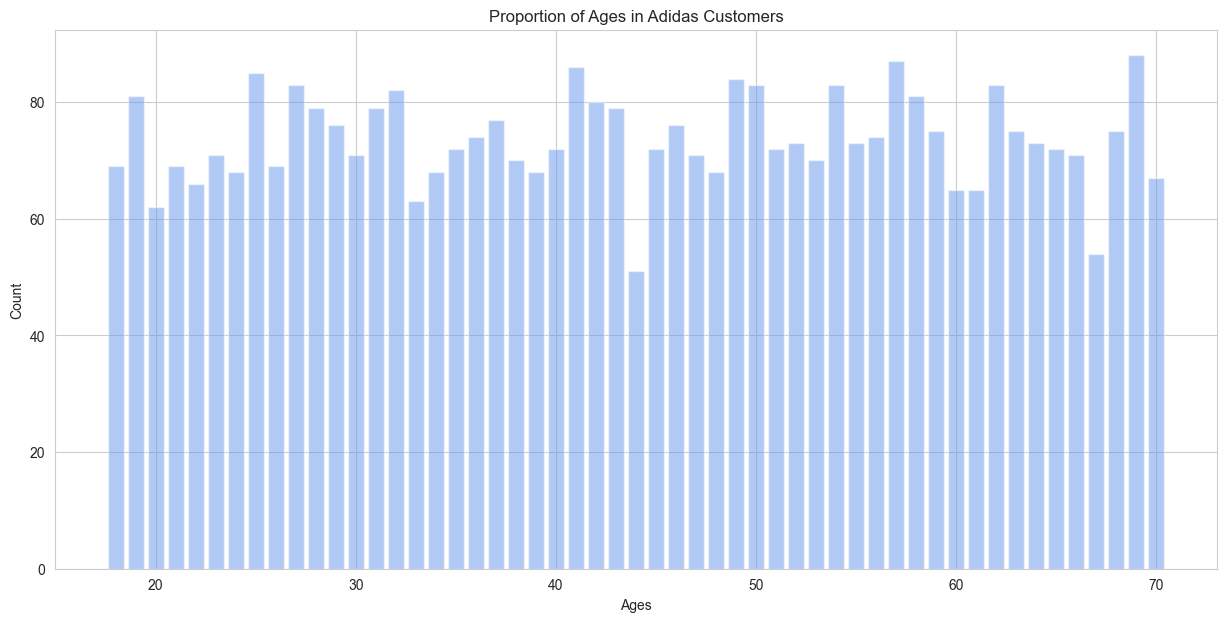

In [66]:
# 1.2 Proportion of ages
age_counts = df_trends['Age'].value_counts().sort_index()
plt.figure(figsize=(15, 7))
plt.bar(age_counts.index, age_counts.values,  alpha=0.5, color='cornflowerblue')
plt.title('Proportion of Ages in Adidas Customers')
plt.xlabel('Ages')
plt.ylabel('Count')
plt.show()

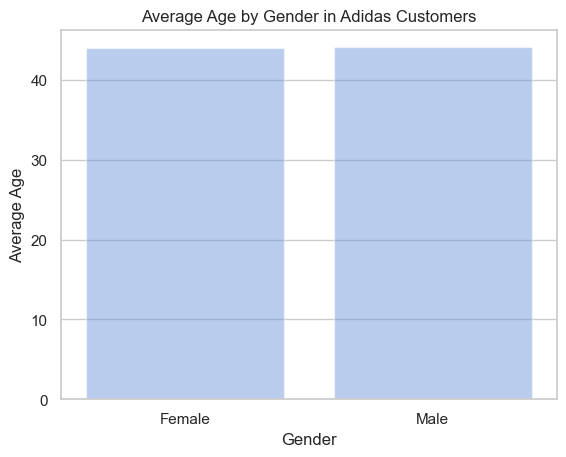

In [67]:
# 1.3 Group the data by gender and calculate the mean age
age_by_gender = df_trends.groupby('Gender')['Age'].mean()

# Plot the results
sns.set(style="whitegrid")
age_plot = sns.barplot(x=age_by_gender.index, y=age_by_gender.values,  alpha=0.5, color='cornflowerblue')
age_plot.set(xlabel='Gender', ylabel='Average Age', title='Average Age by Gender in Adidas Customers')
plt.show()

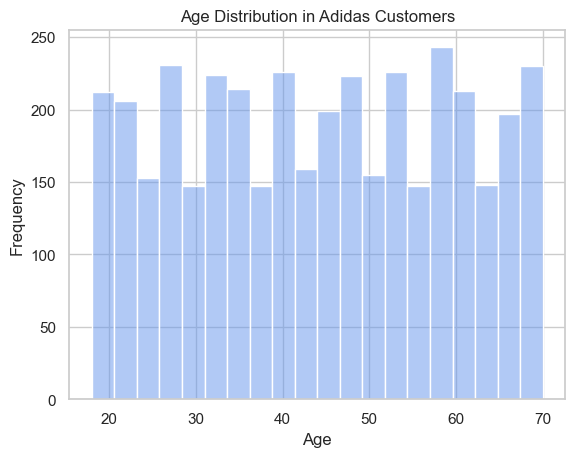

In [68]:
# 1.4 Age Analysis
sns.histplot(df_trends['Age'], bins=20,  alpha=0.5, color='cornflowerblue')
plt.title('Age Distribution in Adidas Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\3185183976.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_previous_purchases_age_group = df_trends.groupby('Age Group')['Previous Purchases'].mean()


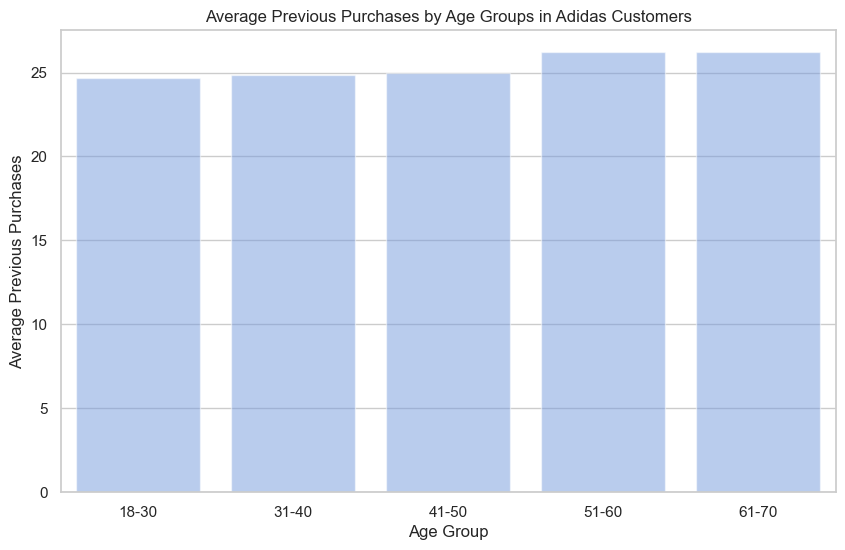

In [69]:
# 1.5 Define age groups
age_bins = [18, 30, 40, 50, 60, 70]
age_labels = ['18-30', '31-40', '41-50', '51-60', '61-70']

# Create 'Age Group' column
df_trends['Age Group'] = pd.cut(df_trends['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculate average previous purchases by age group
average_previous_purchases_age_group = df_trends.groupby('Age Group')['Previous Purchases'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_previous_purchases_age_group.index, y=average_previous_purchases_age_group.values,  alpha=0.5, color='cornflowerblue')
plt.title('Average Previous Purchases by Age Groups in Adidas Customers')
plt.xlabel('Age Group')
plt.ylabel('Average Previous Purchases')
plt.show()

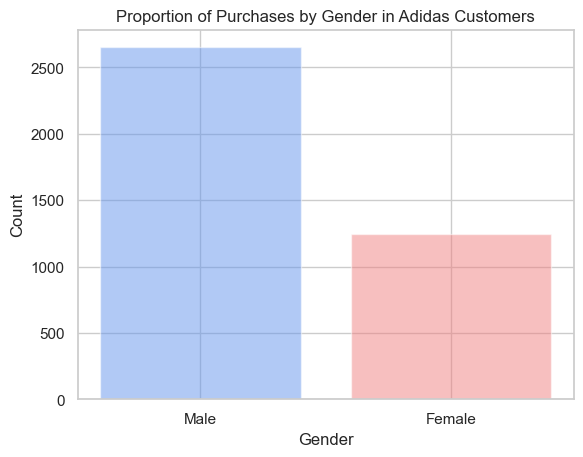

In [70]:
# 1.6 Proportion of Purchases by Gender
gender_counts = df_trends['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, alpha=0.5, color=['cornflowerblue', 'lightcoral'])
plt.title('Proportion of Purchases by Gender in Adidas Customers')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

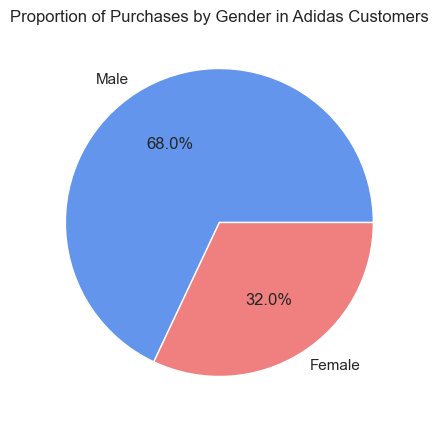

In [71]:
plt.figure(figsize=(5, 5))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['cornflowerblue', 'lightcoral'])
plt.title('Proportion of Purchases by Gender in Adidas Customers')
plt.show()

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\3164035628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_previous_purchases_gender.index, y=average_previous_purchases_gender.values, alpha=0.5, palette=['cornflowerblue', 'lightcoral'])


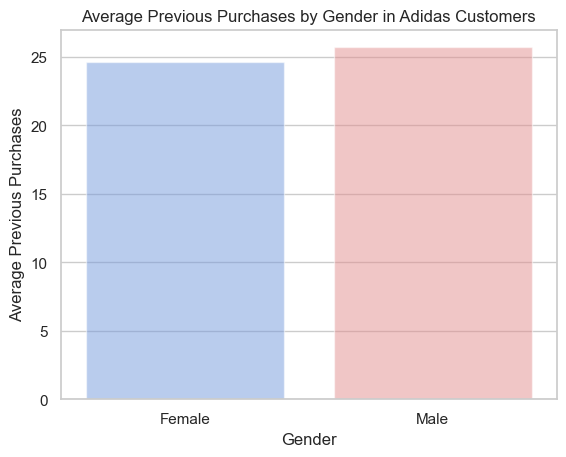

In [72]:
average_previous_purchases_gender = df_trends.groupby('Gender')['Previous Purchases'].mean()

# Average Previous Purchases by Gender with specified colors
sns.barplot(x=average_previous_purchases_gender.index, y=average_previous_purchases_gender.values, alpha=0.5, palette=['cornflowerblue', 'lightcoral'])
plt.title('Average Previous Purchases by Gender in Adidas Customers')
plt.xlabel('Gender')
plt.ylabel('Average Previous Purchases')
plt.show()

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\1023487393.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_purchase_amount_gender.index, y=average_purchase_amount_gender.values, alpha=0.5, palette=['cornflowerblue', 'lightcoral'])


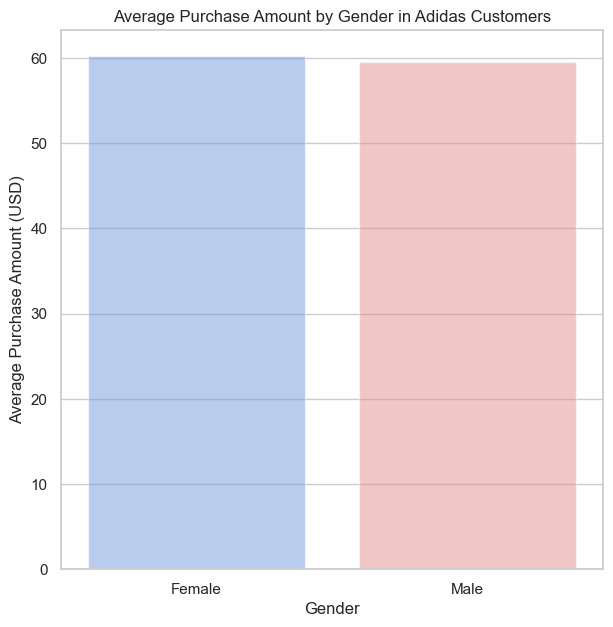

In [73]:
# 1.8 Calculate average purchase amount by gender
average_purchase_amount_gender = df_trends.groupby('Gender')['Purchase Amount (USD)'].mean()

# Plotting
plt.figure(figsize=(7, 7))
sns.barplot(x=average_purchase_amount_gender.index, y=average_purchase_amount_gender.values, alpha=0.5, palette=['cornflowerblue', 'lightcoral'])
plt.title('Average Purchase Amount by Gender in Adidas Customers')
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

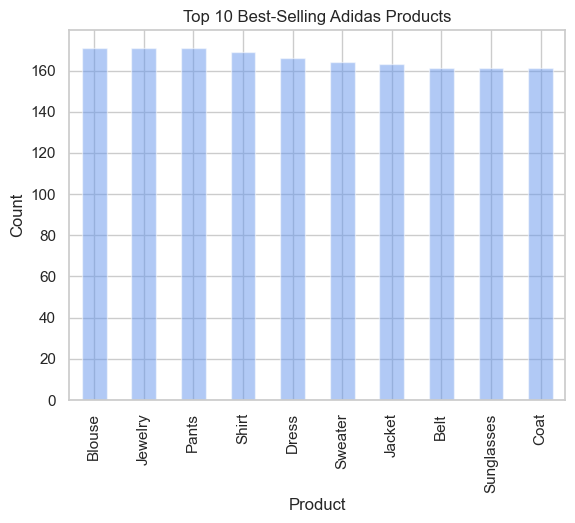

In [74]:
# 2. Product Insights
# Analyze item sales and categories
best_sellers = df_trends['Item Purchased'].value_counts().head(10)
best_sellers.plot(kind='bar', title='Top 10 Best-Selling Adidas Products', alpha=0.5, color='cornflowerblue')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

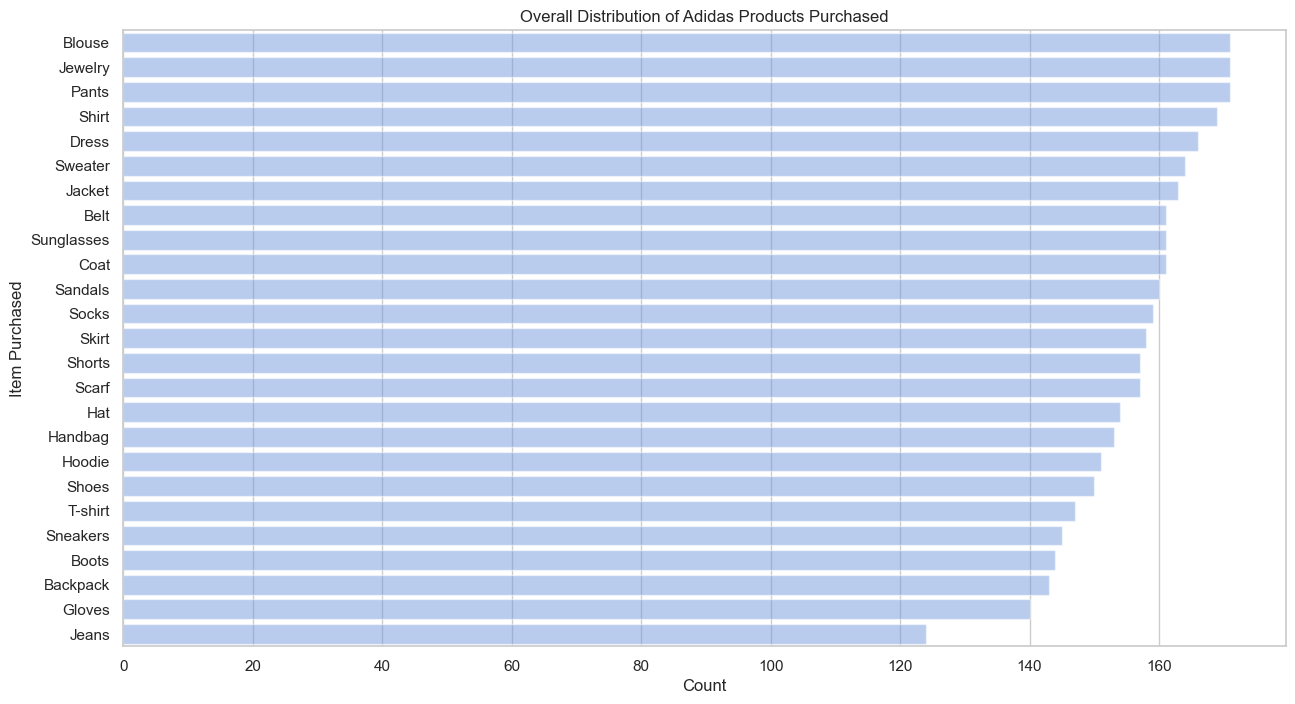

In [75]:
# 2.1. Item Purchased Analysis (Overall Count)
plt.figure(figsize=(15, 8))
sns.countplot(y='Item Purchased', data=df_trends, order=df_trends['Item Purchased'].value_counts().index, alpha=0.5, color='cornflowerblue')
plt.title('Overall Distribution of Adidas Products Purchased')
plt.xlabel('Count')
plt.ylabel('Item Purchased')
plt.show()

Text(0.5, 1.0, 'Number of Adidas Products Sold by Size')

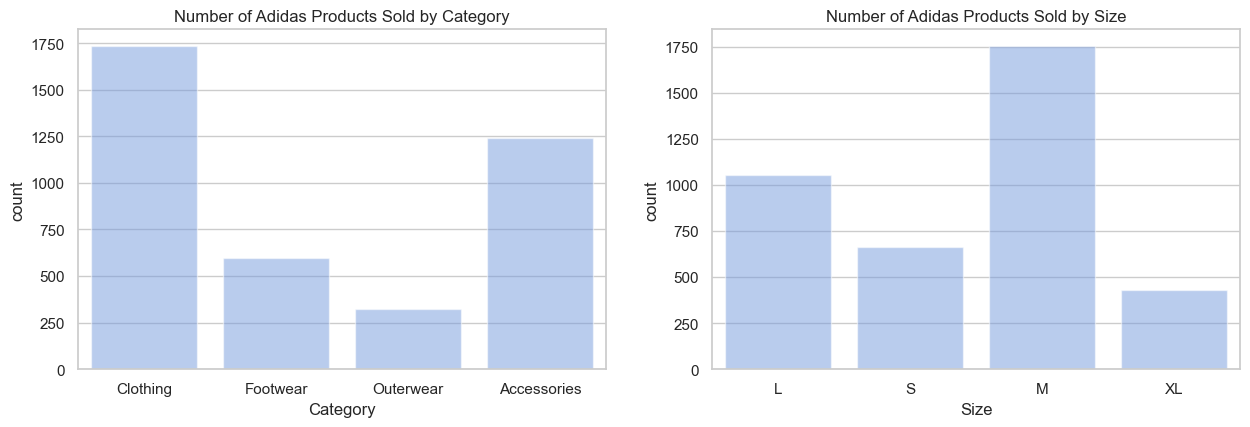

In [76]:
# 2.2 Categorical Variables
plt.figure(figsize=(15, 15))

# Number of products sold by category
plt.subplot(3, 2, 1)
sns.countplot(x='Category', data=df_trends, alpha=0.5, color='cornflowerblue')
plt.title('Number of Adidas Products Sold by Category')

# Number of products sold by size
plt.subplot(3, 2, 2)
sns.countplot(x='Size', data=df_trends, alpha=0.5, color='cornflowerblue')
plt.title('Number of Adidas Products Sold by Size')

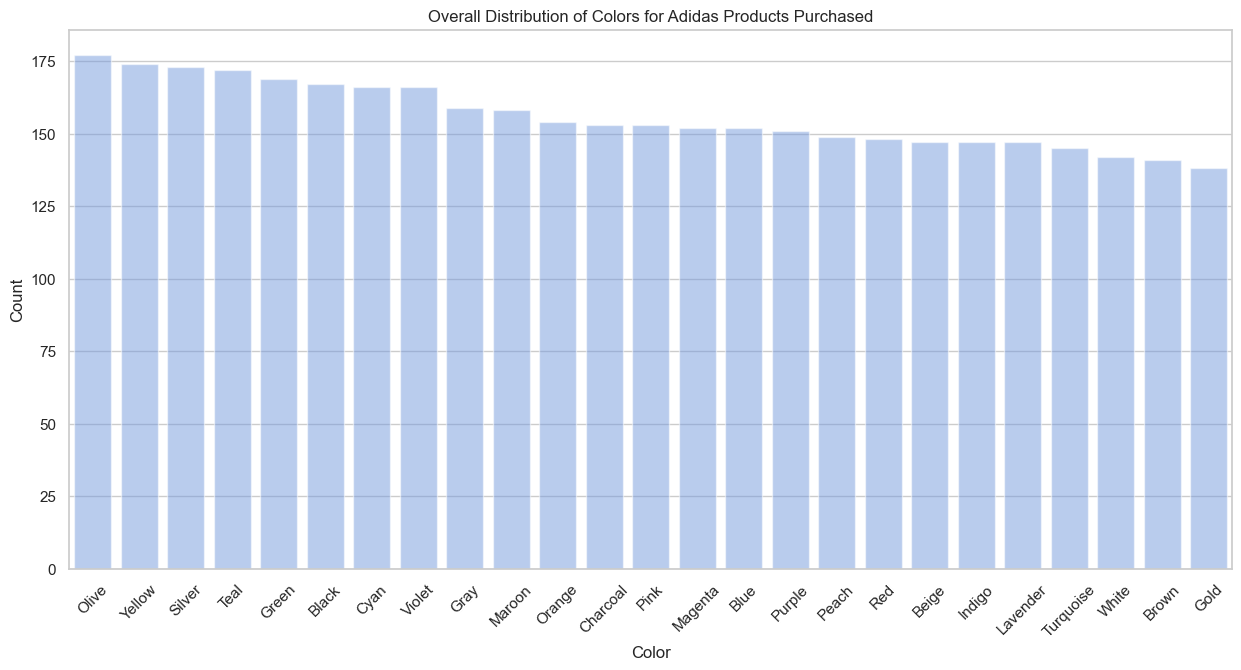

In [77]:
# 2.3 Color Analysis (Overall Count)
plt.figure(figsize=(15, 7))
sns.countplot(x='Color', data=df_trends, order=df_trends['Color'].value_counts().index, alpha=0.5, color='cornflowerblue')
plt.title('Overall Distribution of Colors for Adidas Products Purchased')
plt.xlabel('Color')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

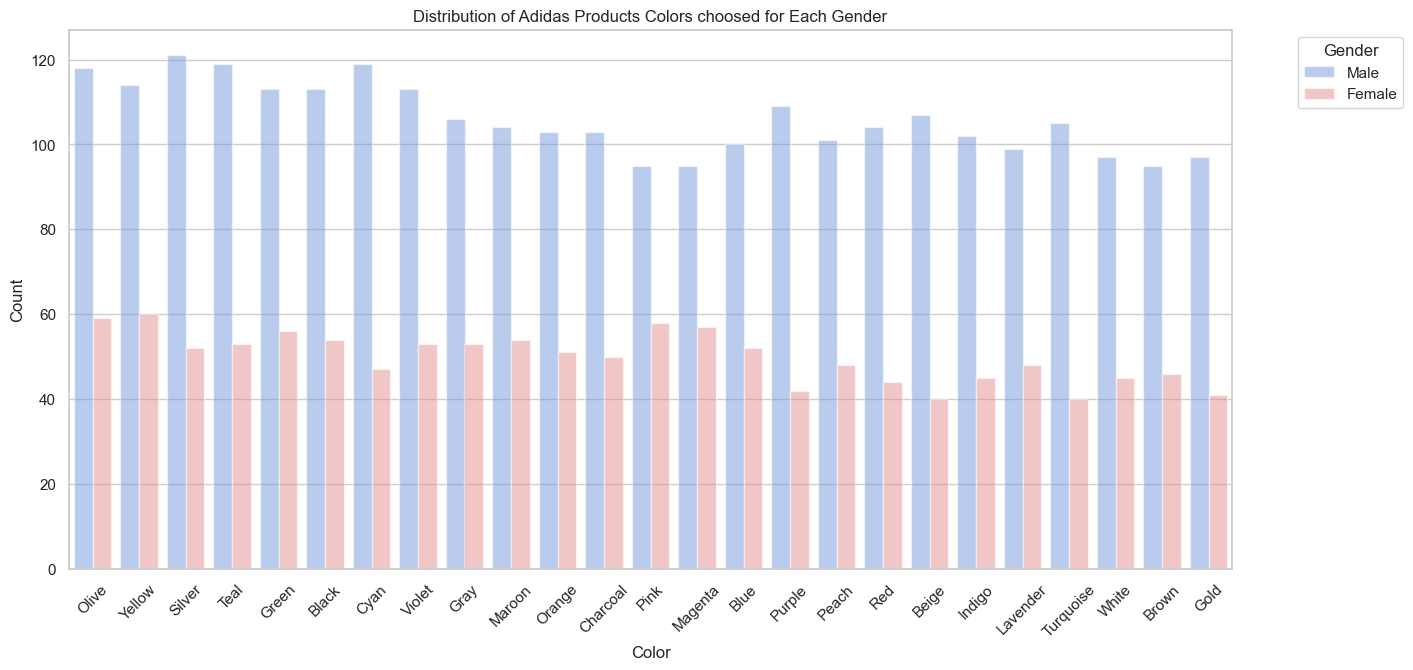

In [78]:
# 2.4 Color Analysis (Count by Gender)
plt.figure(figsize=(15, 7))
colors = ['cornflowerblue', 'lightcoral']
sns.countplot(x='Color', hue='Gender', data=df_trends, order=df_trends['Color'].value_counts().index, alpha=0.5, palette=colors)
plt.title('Distribution of Adidas Products Colors choosed for Each Gender')
plt.xlabel('Color')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

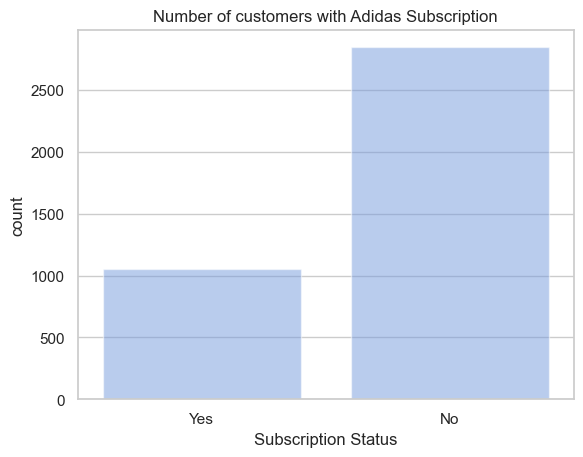

In [79]:
# 3. Subscription Analysis
sns.countplot(x='Subscription Status', data=df_trends, alpha=0.5, color='cornflowerblue')
plt.title('Number of customers with Adidas Subscription')
plt.show()

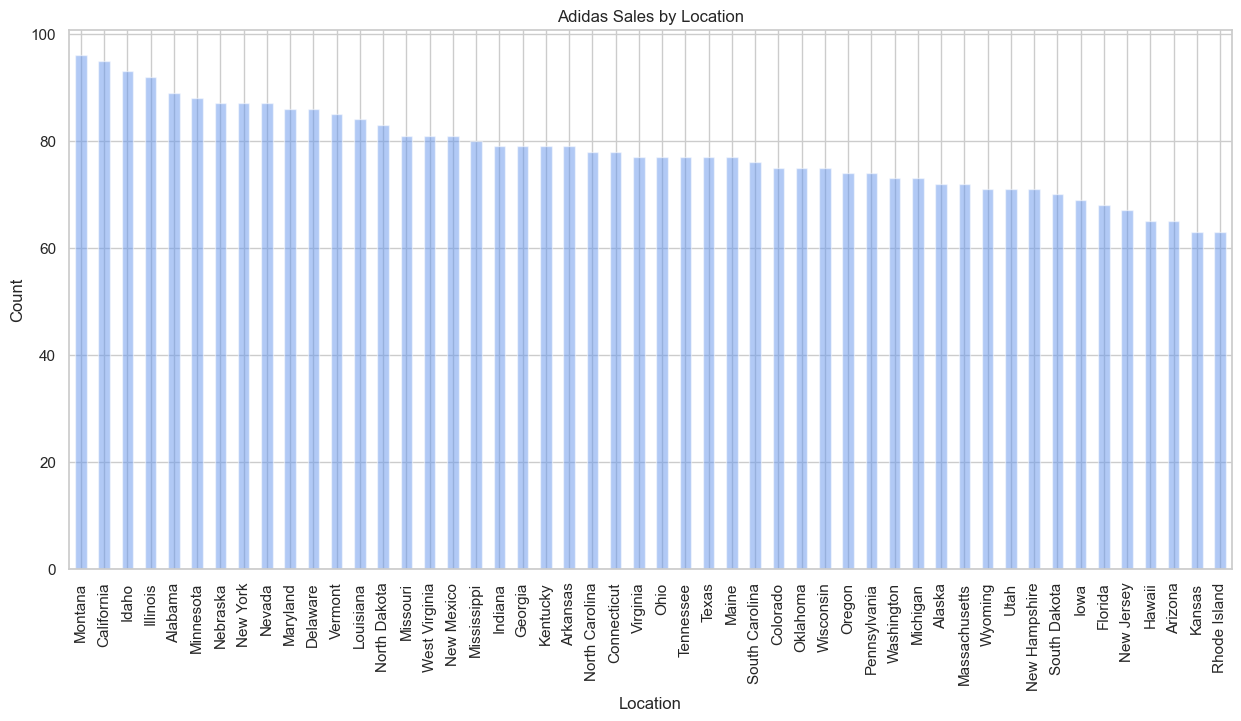

In [80]:
# 4. Regional Dynamics
# Analyze location data
location_counts = df_trends['Location'].value_counts()
plt.figure(figsize=(15, 7))
location_counts.plot(kind='bar', title='Adidas Sales by Location', alpha=0.5, color='cornflowerblue')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\2213192841.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, alpha=0.5, palette='pastel')


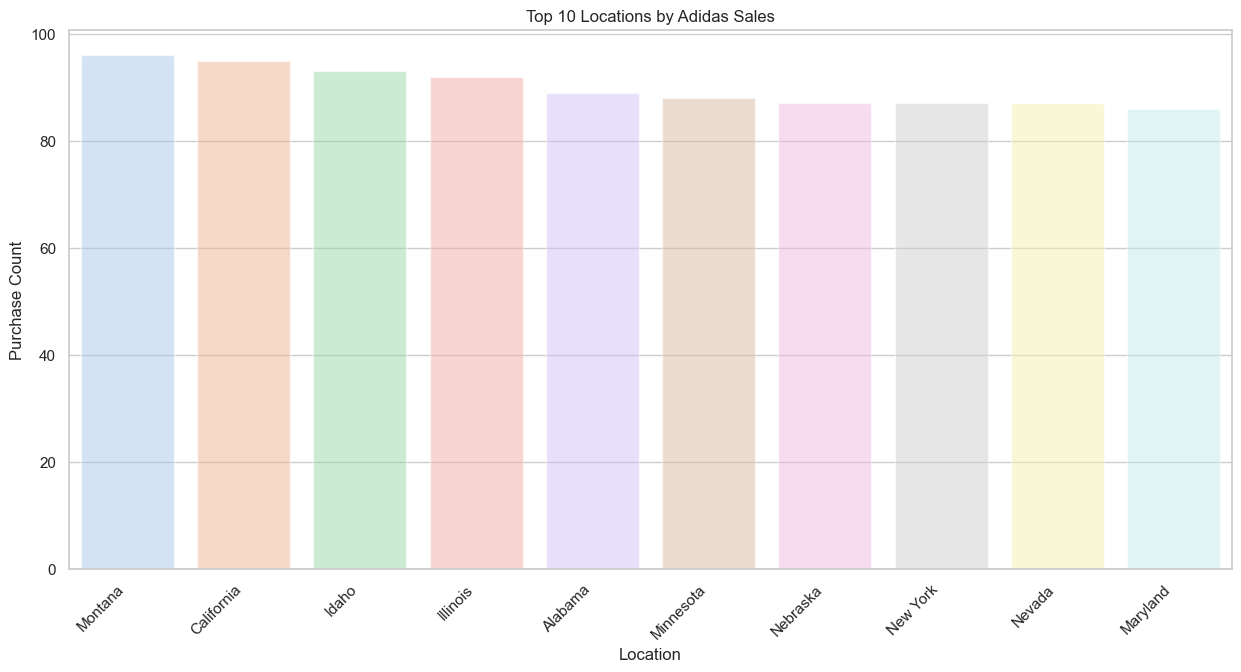

In [81]:
# 4.1 Get the top 10 locations by purchase count
top_locations = df_trends['Location'].value_counts().nlargest(10)

# Plotting
plt.figure(figsize=(15, 7))
sns.barplot(x=top_locations.index, y=top_locations.values, alpha=0.5, palette='pastel')
plt.title('Top 10 Locations by Adidas Sales')
plt.xlabel('Location')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\520936880.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.index, y=top_locations.values, alpha=0.5, palette='pastel')


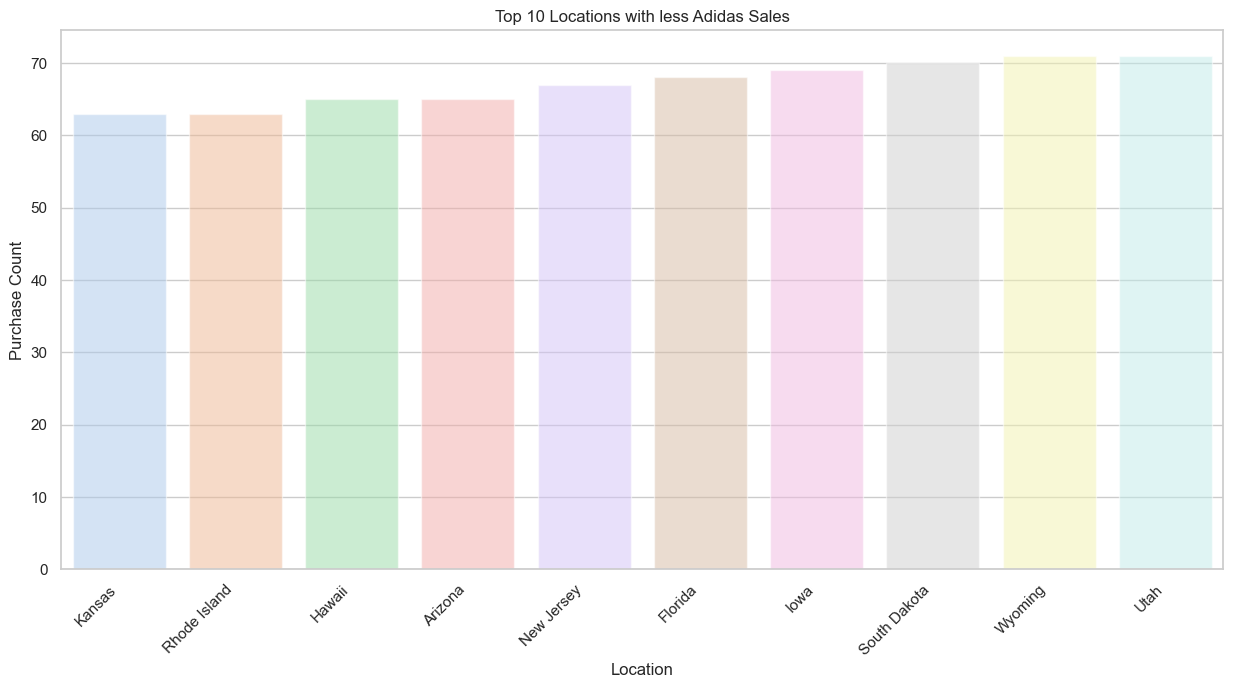

In [82]:
# 4.2 Get the top 10 locations by purchase count
top_locations = df_trends['Location'].value_counts().nsmallest(10)

# Plotting
plt.figure(figsize=(15, 7))
sns.barplot(x=top_locations.index, y=top_locations.values, alpha=0.5, palette='pastel')
plt.title('Top 10 Locations with less Adidas Sales')
plt.xlabel('Location')
plt.ylabel('Purchase Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

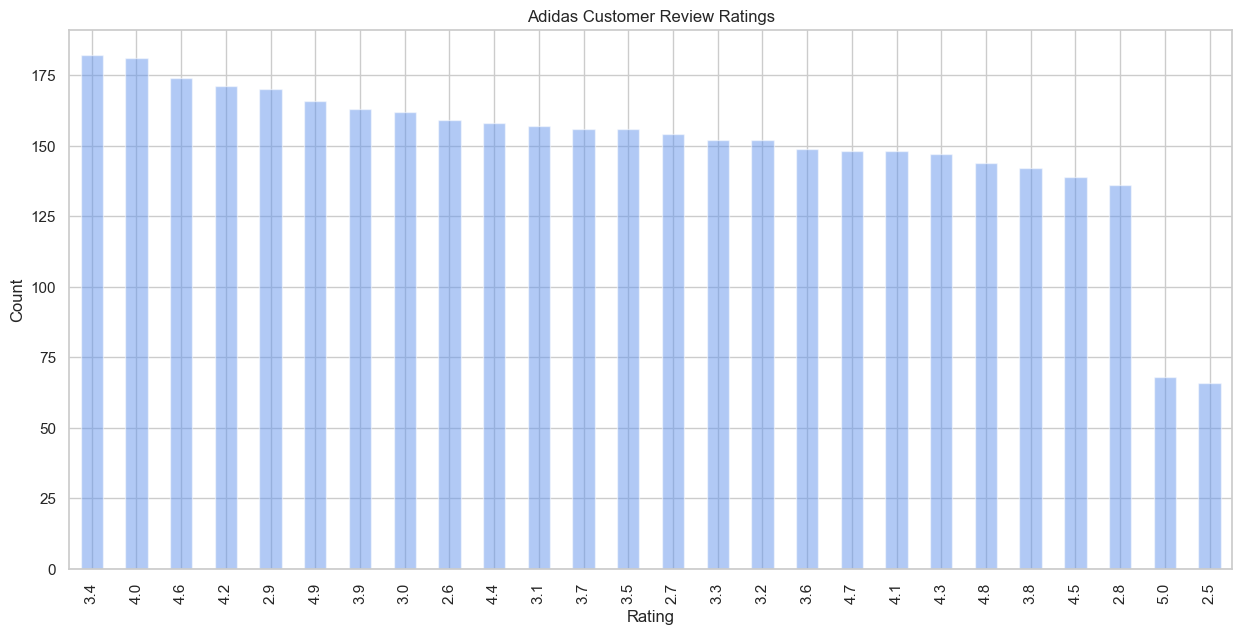

In [83]:
# 5. Customer Satisfaction
# Analyze review ratings
review_ratings = df_trends['Review Rating'].value_counts()
plt.figure(figsize=(15, 7))
review_ratings.plot(kind='bar', title='Adidas Customer Review Ratings', alpha=0.5, color='cornflowerblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

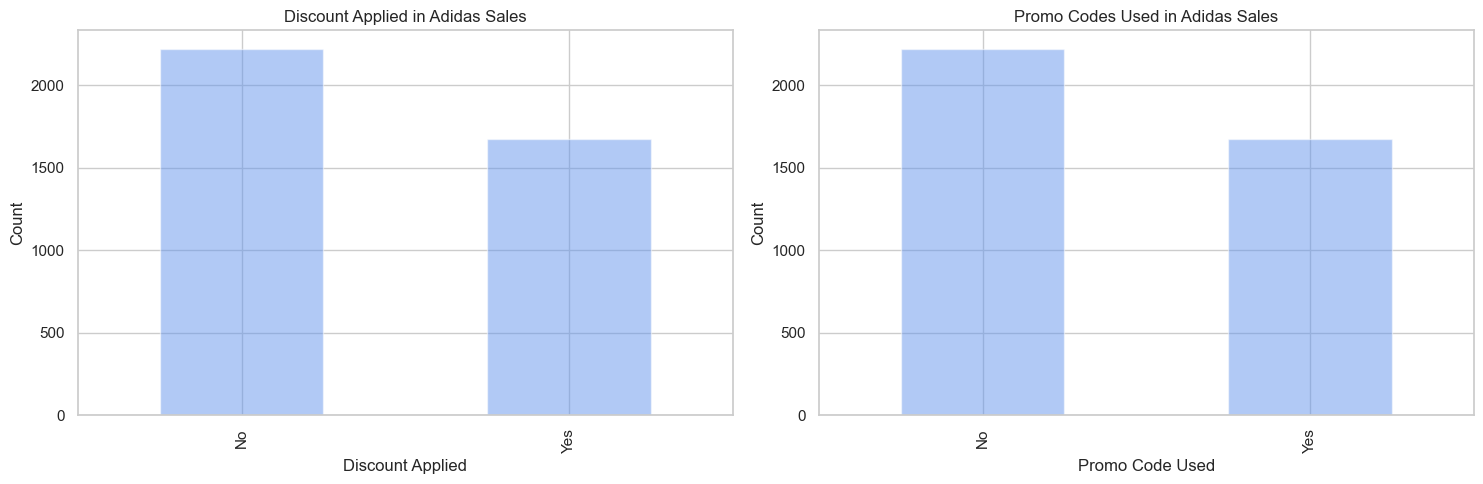

In [84]:
# 6. Promotion and Discount Optimization
# Analyze discounts and promo codes

discount_counts = df_trends['Discount Applied'].value_counts()
promo_counts = df_trends['Promo Code Used'].value_counts()

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the Discount Applied data in the first subplot
discount_counts.plot(kind='bar', title='Discount Applied in Adidas Sales', alpha=0.5, color='cornflowerblue', ax=axes[0])
axes[0].set_xlabel('Discount Applied')
axes[0].set_ylabel('Count')

# Plot the Promo Codes Used data in the second subplot
promo_counts.plot(kind='bar', title='Promo Codes Used in Adidas Sales', alpha=0.5, color='cornflowerblue', ax=axes[1])
axes[1].set_xlabel('Promo Code Used')
axes[1].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()

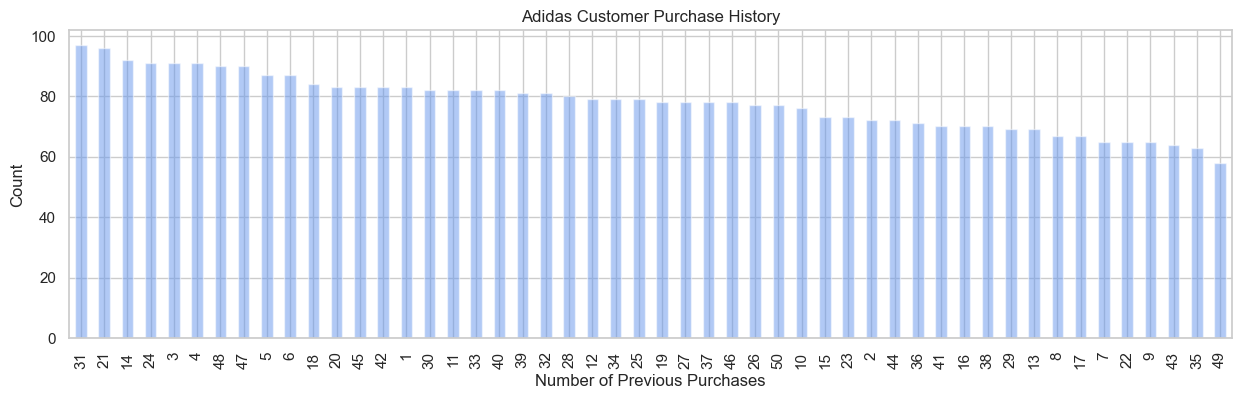

In [85]:
# 7. Customer Loyalty
# Analyze previous purchases
repeat_customers = df_trends['Previous Purchases'].value_counts()
plt.figure(figsize=(15, 4))
repeat_customers.plot(kind='bar', title='Adidas Customer Purchase History', alpha=0.5, color='cornflowerblue')
plt.xlabel('Number of Previous Purchases')
plt.ylabel('Count')
plt.show()

In [86]:
# 7.1 Purchasing Frequency Analysis

# Count the number of customers with 1 previous purchase
customers_with_one_previous_purchase = repeat_customers.get(1, 0)

# Print the count of customers who bought only once
print(f"Number of customers who bought only once: {customers_with_one_previous_purchase}")

# Count the number of customers with more than one previous purchase
customers_with_more_than_one_previous_purchase = repeat_customers[repeat_customers.index > 1].sum()

# Print the count of customers who bought more than once
print(f"Number of customers who bought more than once: {customers_with_more_than_one_previous_purchase}")

Number of customers who bought only once: 83
Number of customers who bought more than once: 3817


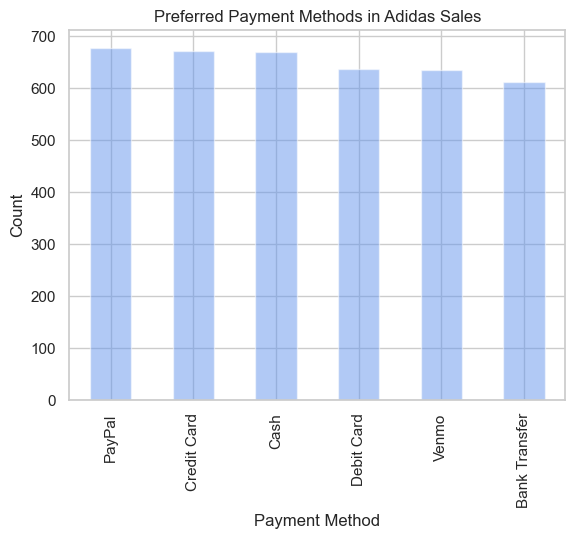

In [87]:
# 8. Payment Preferences
# Analyze preferred payment methods
payment_methods = df_trends['Preferred Payment Method'].value_counts()
payment_methods.plot(kind='bar', title='Preferred Payment Methods in Adidas Sales', alpha=0.5, color='cornflowerblue')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

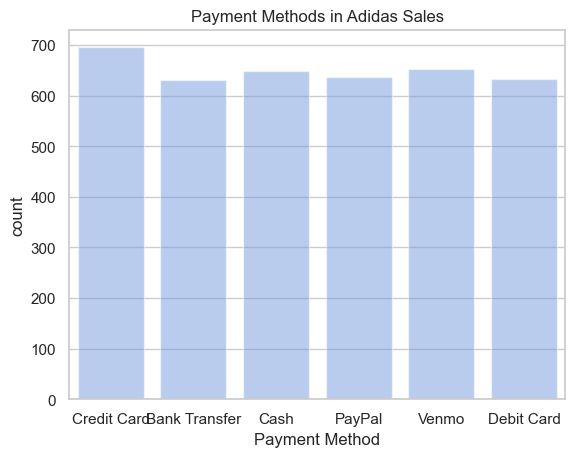

In [88]:
# 8.1 Payment Methods in Adidas Sales
sns.countplot(x='Payment Method', data=df_trends, alpha=0.5, color='cornflowerblue')
plt.title('Payment Methods in Adidas Sales')
plt.show()

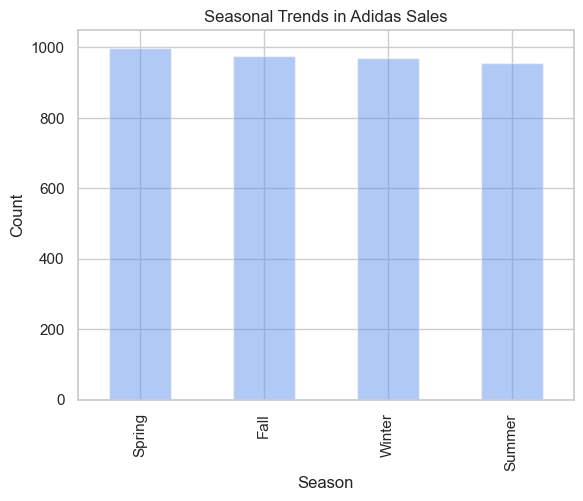

In [89]:
# 9. Seasonal Trends
# Analyze seasonal variations
seasonal_sales = df_trends['Season'].value_counts()
seasonal_sales.plot(kind='bar', title='Seasonal Trends in Adidas Sales', alpha=0.5, color='cornflowerblue')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

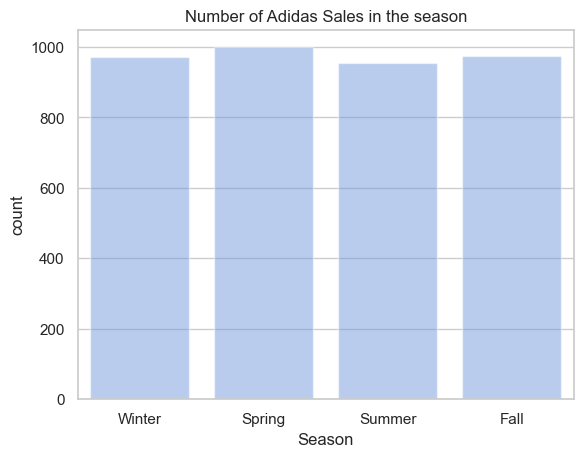

In [90]:
# 9.1 Number of products sold in the season
sns.countplot(x='Season', data=df_trends, alpha=0.5, color='cornflowerblue')
plt.title('Number of Adidas Sales in the season')
plt.show()

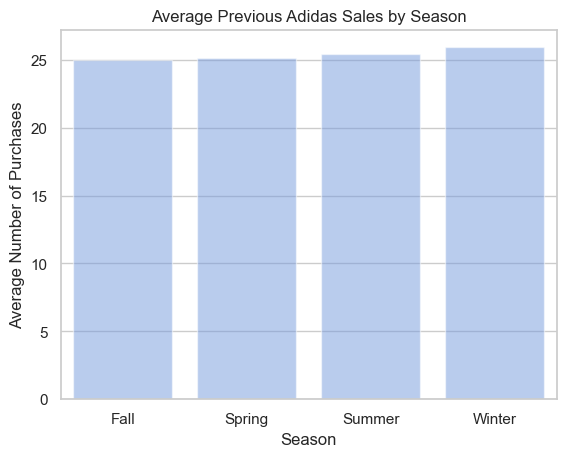

In [91]:
# 9.2 Average Previous Purchases by Season
# Calculate average previous purchases by gender
average_previous_purchases_season = df_trends.groupby('Season')['Previous Purchases'].mean()

sns.barplot(x=average_previous_purchases_season.index, y=average_previous_purchases_season.values, order=average_previous_purchases_season.index, alpha=0.5, color='cornflowerblue')
plt.title('Average Previous Adidas Sales by Season')
plt.xlabel('Season')
plt.ylabel('Average Number of Purchases')
plt.show()

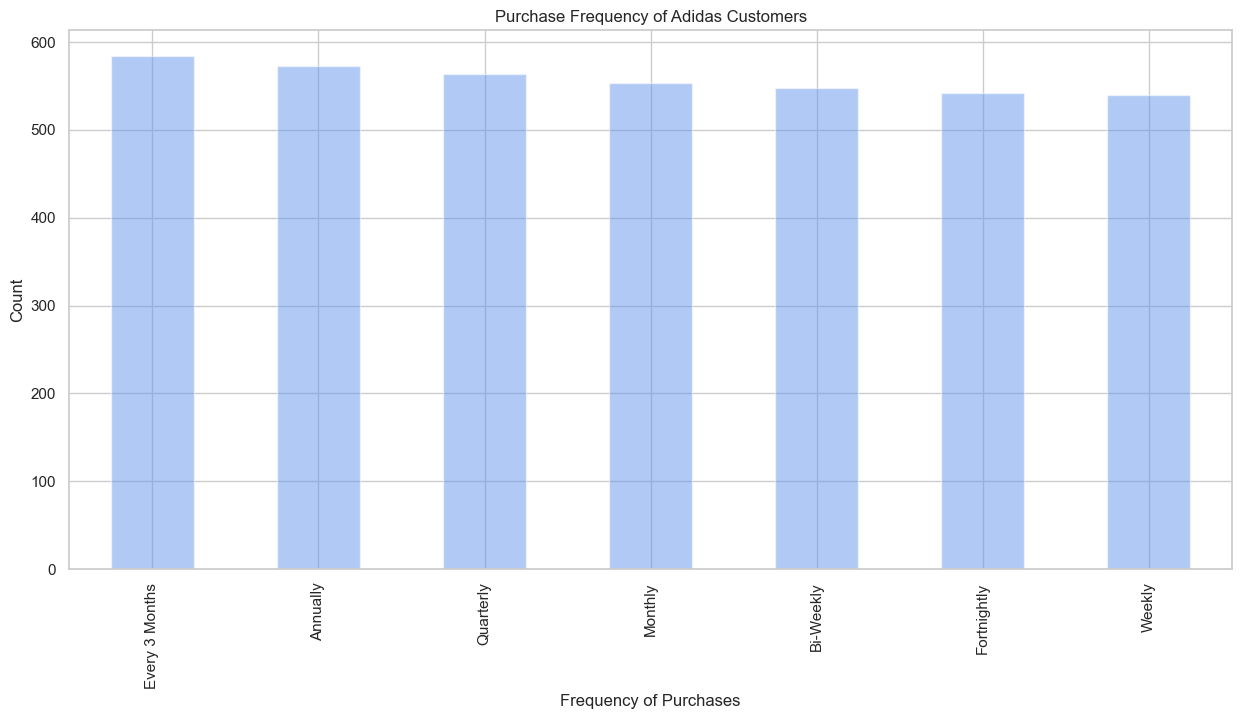

In [92]:
# 10. Purchase Frequency
# Analyze purchase frequency
purchase_frequency = df_trends['Frequency of Purchases'].value_counts()
plt.figure(figsize=(15, 7))
purchase_frequency.plot(kind='bar', title='Purchase Frequency of Adidas Customers', alpha=0.5, color='cornflowerblue')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.show()

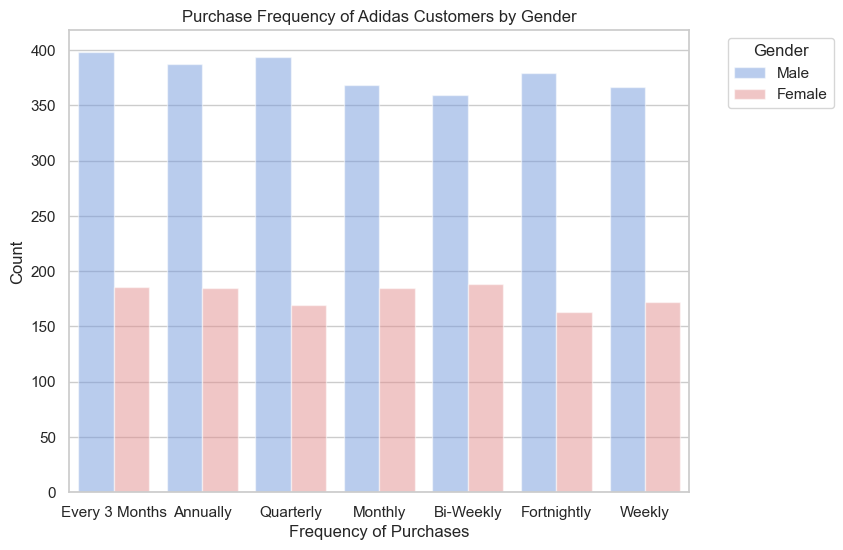

In [93]:
# 10.1 Frequency of Purchases by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='Frequency of Purchases', hue='Gender', data=df_trends, order=df_trends['Frequency of Purchases'].value_counts().index, alpha=0.5, palette=['cornflowerblue', 'lightcoral'])
plt.title('Purchase Frequency of Adidas Customers by Gender')
plt.xlabel('Frequency of Purchases')
plt.ylabel('Count')
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [94]:
# 11. Purchase Behavior
# Get the minimum and maximum purchase amounts in dollars
min_purchase_amount = df_trends['Purchase Amount (USD)'].min()
max_purchase_amount = df_trends['Purchase Amount (USD)'].max()

print(f"The minimum purchase amount is: ${min_purchase_amount:.2f}")
print(f"The maximum purchase amount is: ${max_purchase_amount:.2f}")

The minimum purchase amount is: $20.00
The maximum purchase amount is: $100.00


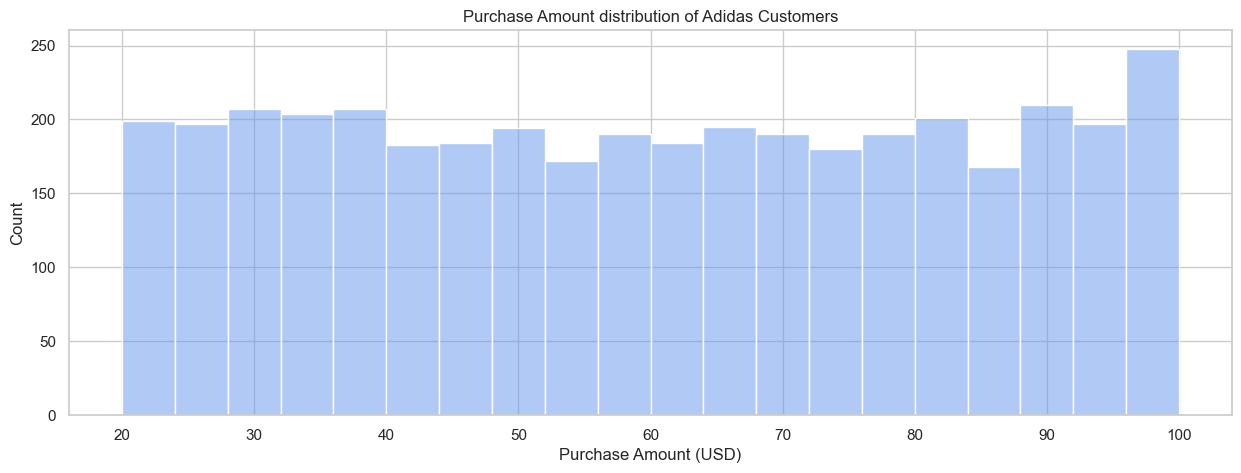

In [95]:
# 11.1 Purchase Amount distribution 
plt.figure(figsize=(15, 5))
plt.title('Purchase Amount distribution of Adidas Customers')
sns.histplot(df_trends['Purchase Amount (USD)'], bins=20, alpha=0.5, color='cornflowerblue')
plt.show()

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\961314241.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_purchase_amount_group = df_trends.groupby('Amount Group')['Purchase Amount (USD)'].mean()


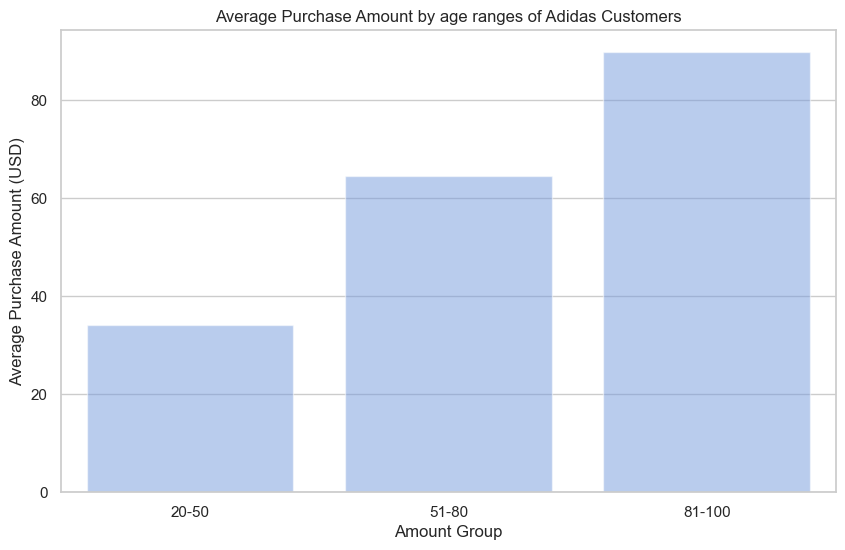

In [96]:
# 11.2 Average purchase amount by ranges
# Define purchase amount groups
amount_bins = [20, 50, 80, 100]
amount_labels = ['20-50', '51-80', '81-100']

# Create 'Amount Group' column
df_trends['Amount Group'] = pd.cut(df_trends['Purchase Amount (USD)'], bins=amount_bins, labels=amount_labels, right=False)

# Calculate average purchase amount by amount group
average_purchase_amount_group = df_trends.groupby('Amount Group')['Purchase Amount (USD)'].mean()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=average_purchase_amount_group.index, y=average_purchase_amount_group.values, alpha=0.5, color='cornflowerblue')
plt.title('Average Purchase Amount by age ranges of Adidas Customers')
plt.xlabel('Amount Group')
plt.ylabel('Average Purchase Amount (USD)')
plt.show()

# Comparison analysis with the competition.

In [97]:
dl = %sql SELECT * FROM data_adidasvsnike
df_comp = dl.DataFrame()

Running query in 'duckdb:///../data/adidas.duckdb'

The dataset overview.

In [98]:
df_comp.head(5)

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13T15:06:14
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13T15:06:15
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13T15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13T15:06:15
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13T15:06:15


In [99]:
# No null values on data
df_comp.info()
df_comp.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Description    3265 non-null   object 
 7   Rating         3268 non-null   float64
 8   Reviews        3268 non-null   int64  
 9   Last Visited   3268 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 255.4+ KB


,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


Time series 'Last Visited' gives out date of data retrieval of 36 seconds. No much info there. **Just speaks to the relevance of the analysis aplicability.**

### Data Cleaning and Processing

In [100]:
# Date formatting, and dropping of unuseful data 
df_comp['Last Visited'] = pd.to_datetime(df_comp['Last Visited'])
df_comp = df_comp.drop(columns=['Product ID'], axis = 1)
df_comp.head(5)

,Product Name,Listing Price,Sale Price,Discount,Brand,Description,Rating,Reviews,Last Visited
0,Women's adidas Originals NMD_Racer Primeknit S...,14999,7499,50,Adidas Adidas ORIGINALS,Channeling the streamlined look of an '80s rac...,4.8,41,2020-04-13 15:06:14
1,Women's adidas Originals Sleek Shoes,7599,3799,50,Adidas ORIGINALS,"A modern take on adidas sport heritage, tailor...",3.3,24,2020-04-13 15:06:15
2,Women's adidas Swim Puka Slippers,999,599,40,Adidas CORE / NEO,These adidas Puka slippers for women's come wi...,2.6,37,2020-04-13 15:06:15
3,Women's adidas Sport Inspired Questar Ride Shoes,6999,3499,50,Adidas CORE / NEO,"Inspired by modern tech runners, these women's...",4.1,35,2020-04-13 15:06:15
4,Women's adidas Originals Taekwondo Shoes,7999,3999,50,Adidas ORIGINALS,This design is inspired by vintage Taekwondo s...,3.5,72,2020-04-13 15:06:15


In [101]:
# Sale price, Amount it actually sells for
# Listing price, Amount asked by seller
# We look at zero values 

# [(i, j) for i, j in enumerate(mylist)] We drop i
List_price_zeros = [idx for idx, value in enumerate(df_comp['Listing Price']) if value == 0]
Sale_price_zeros = [idx for idx, value in enumerate(df_comp['Sale Price']) if value == 0]
Disc_zeros = [idx for idx, value in enumerate(df_comp['Discount']) if value == 0]
print(f'length of Zeros list on List Price: {len(List_price_zeros)},\n Sale Price: {len(Sale_price_zeros)},\n Discounts: {len(Disc_zeros)}')
# Missing Listings, next best knowledge of price is that of sale, we fill in
df_comp.iloc[List_price_zeros, 1] = df_comp.iloc[List_price_zeros, 2]
# No more gaps
print(f"# of Zeros on Listing Price after standardizing: {len([idx for idx, value in enumerate(df_comp['Listing Price']) if value == 0])}")
# We look at the unique brands
print(df_comp.Brand.unique())
# There appears to be a misnomber, we replace it with apparent correct string
df_comp['Brand'] = df_comp['Brand'].replace('Adidas Adidas ORIGINALS', 'Adidas ORIGINALS')
print(df_comp.Brand.unique())

length of Zeros list on List Price: 426,
 Sale Price: 0,
 Discounts: 1302
# of Zeros on Listing Price after standardizing: 0
['Adidas Adidas ORIGINALS' 'Adidas ORIGINALS' 'Adidas CORE / NEO'
 'Adidas SPORT PERFORMANCE' 'Nike']
['Adidas ORIGINALS' 'Adidas CORE / NEO' 'Adidas SPORT PERFORMANCE' 'Nike']


### EDA of brands

There's a visible use of discounts on Adidas part, and sub-brands give them out approximatlly equally

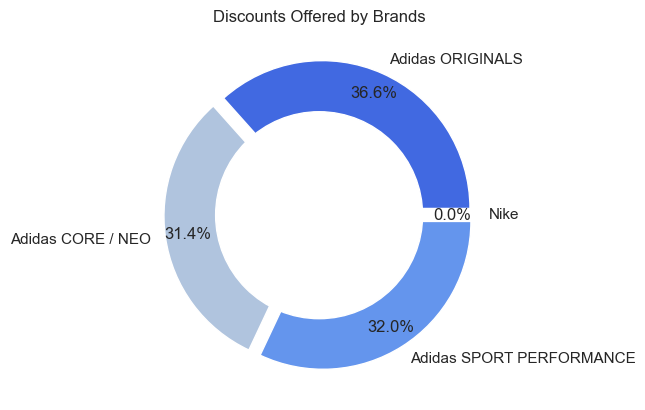

In [102]:
Brands = df_comp.Brand.unique()
 
# Setting size in Chart based on 
# given values
data = df_comp.groupby(['Brand'])['Discount'].mean().to_numpy()
 
# colors
colors = ['royalblue', 'lightsteelblue', 'cornflowerblue', 
          'red']
# explosion
explode = (0.05, 0.05, 0.05, 0.05)
 
# Pie Chart
plt.pie(data, colors=colors, labels=Brands,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Discounts Offered by Brands')
 
# Displaying Chart
plt.show()

### Data pairing

In [103]:
# We better group by company, getting together sub-brands and dropping Nike

Nike = df_comp.groupby(['Brand']).get_group('Nike')
subb_list = [df_comp.groupby(['Brand']).get_group(subb) for subb in df_comp.Brand.unique() if subb != 'Nike']
Adidas=pd.concat(subb_list)
Adidas.reset_index(inplace=True,drop=True)

Adidas offers 745 (by the time listed before) more products in general

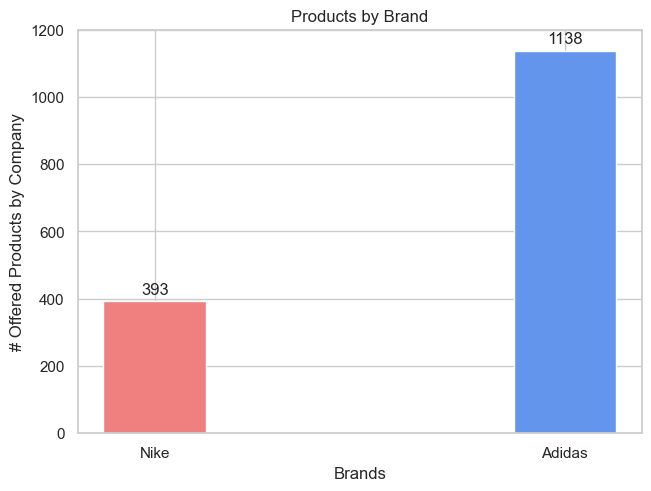

In [104]:
# Count for unique values and count again total
fig, ax = plt.subplots(layout='constrained') 

ax.set_ylabel('# Offered Products by Company')
ax.set_xlabel('Brands')
ax.bar_label(ax.bar(np.arange(len(['Nike', 'Adidas'])) + 0.25, [Nike['Product Name'].value_counts().count(),
                             Adidas['Product Name'].value_counts().count()], 0.25,color = ['lightcoral', 'cornflowerblue']), padding=3)
ax.set_ylim(0, 1200)
ax.set_xticks(np.arange(len(['Nike', 'Adidas'])) + 0.25, ['Nike', 'Adidas'])
ax.set_title('Products by Brand')
plt.show()

The following are the  most purchased products from both brands. Adidas produces more overall common products.

C:\Users\padro\AppData\Local\Temp\ipykernel_8208\442788379.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
C:\Users\padro\AppData\Local\Temp\ipykernel_8208\442788379.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)


<function matplotlib.pyplot.show(close=None, block=None)>

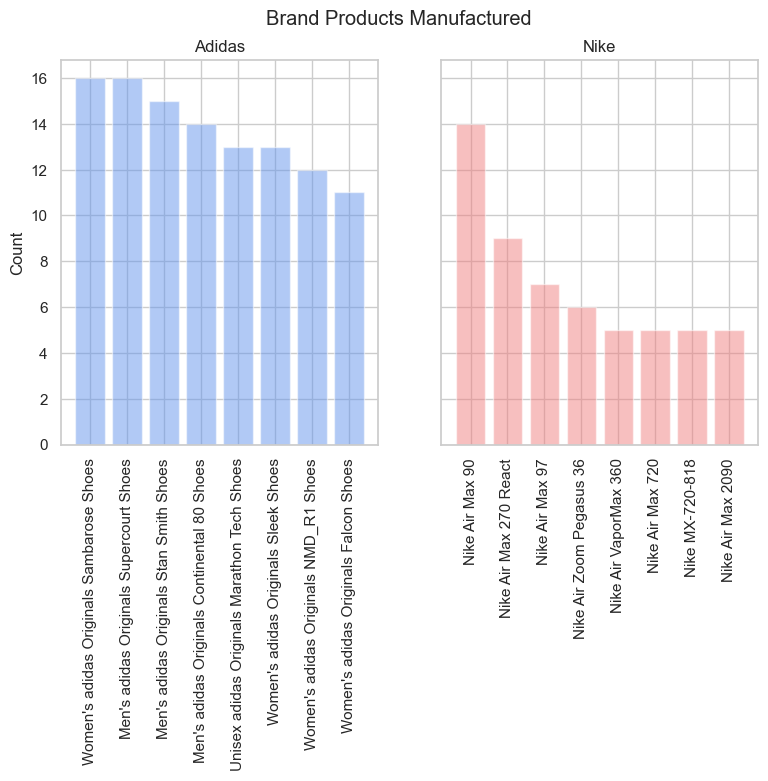

In [105]:
# Inferior limit of 11 count of product, below that not much variability
fig, ax = plt.subplots(1,2, sharey=True, figsize=(9,5))
ax[0].bar(Adidas['Product Name'].value_counts().head(8).index,
           Adidas['Product Name'].value_counts().head(8), color='cornflowerblue', alpha=0.5)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=90)
ax[1].bar(Nike['Product Name'].value_counts().head(8).index,
           Nike['Product Name'].value_counts().head(8), color='lightcoral', alpha=0.5)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=90)
ax[0].set_title('Adidas')
ax[1].set_title('Nike')
fig.suptitle('Brand Products Manufactured')
ax[0].set_ylabel('Count')
plt.show

We look the overall distribution and compare with the descriptive statistics of below. We can see Adidas sells cheaper in average.

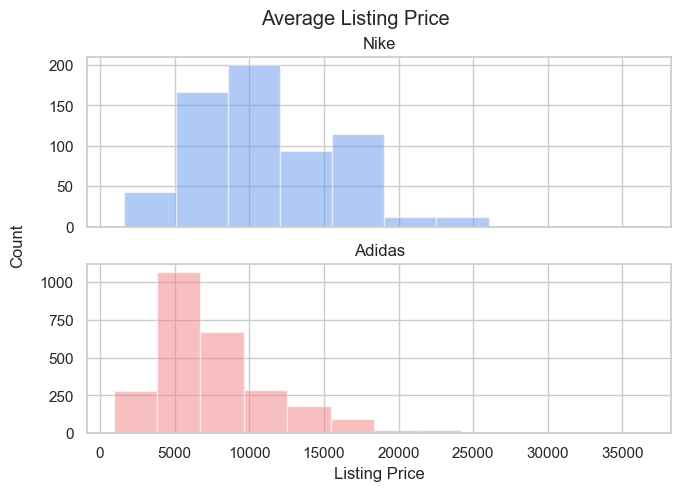

In [106]:
fig, ax = plt.subplots(2,1,sharex=True,layout='constrained')
ax[0].hist(Nike['Listing Price'], histtype='bar', bins=10, alpha=0.5, color='cornflowerblue')
ax[0].set_title('Nike')
ax[1].hist(Adidas['Listing Price'], histtype='bar', bins=10, alpha=0.5, color='lightcoral')
ax[1].set_title('Adidas')
fig.suptitle('Average Listing Price')
ax[1].set_xlabel('Listing Price')
fig.text(-0.04, 0.5, 'Count', va='center', rotation=90)
plt.show()

Poor costumer satisfaction given low mean rating, the std dev of reviews may suggest popularity.

In [107]:
# Consistent with upper dist 
print(f'Nike:\n{Nike.describe()}')

Nike:
       Listing Price    Sale Price  Discount      Rating     Reviews  \
count     643.000000    643.000000     643.0  643.000000  643.000000   
mean    11309.315708  10213.676516       0.0    2.734837    7.181960   
min      1595.000000   1595.000000       0.0    0.000000    0.000000   
25%      7995.000000   6995.000000       0.0    0.000000    0.000000   
50%     10995.000000   9597.000000       0.0    3.800000    1.000000   
75%     14995.000000  12797.000000       0.0    4.600000    6.000000   
max     36500.000000  36500.000000       0.0    5.000000  223.000000   
std      4533.114615   4513.289512       0.0    2.137756   15.968315   

                        Last Visited  
count                            643  
mean   2020-04-13 15:32:43.639191296  
min              2020-04-13 15:27:56  
25%       2020-04-13 15:30:17.500000  
50%              2020-04-13 15:32:34  
75%              2020-04-13 15:34:57  
max              2020-04-13 15:42:57  
std                              

Slight increase of 0.63 on mean rating, The low difference might also be because of lower quality products
(given the cheapness and notable discounts)
 Adidas dev is more so a fact of number of offered products, having Nike the shorter end.

In [108]:
print(f'Adidas:\n{Adidas.describe()}')

Adidas:
       Listing Price    Sale Price     Discount       Rating      Reviews  \
count    2625.000000   2625.000000  2625.000000  2625.000000  2625.000000   
mean     7600.980952   5135.004190    33.459048     3.366362    48.725714   
min       899.000000    449.000000     0.000000     0.000000     0.000000   
25%      4999.000000   2799.000000     0.000000     2.700000    24.000000   
50%      6599.000000   3999.000000    40.000000     3.500000    49.000000   
75%      8999.000000   6499.000000    50.000000     4.300000    74.000000   
max     29999.000000  29999.000000    60.000000     5.000000    99.000000   
std      4071.014515   3589.990374    20.431622     1.159873    28.926042   

                        Last Visited  
count                           2625  
mean   2020-04-13 15:07:07.829333248  
min              2020-04-13 15:06:14  
25%              2020-04-13 15:06:41  
50%              2020-04-13 15:07:07  
75%              2020-04-13 15:07:35  
max              2020-04-

In [109]:
print(len(Nike[Nike.Rating == Nike.Rating.max()]))

120


Again we see Adidas has less equally highly rated products on sale as Nike does given the ratings.

In [110]:
print(len(Adidas[Adidas.Rating == Adidas.Rating.max()]))

87
